# Bank Marketing

1.Project Description

Prediction- Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

The given dataset contains information about the clients such as their age, job type, marital status, education level, credit in default, housing loan, personal loan, type of communication, contact month and day of week, contact duration, number of contacts performed during the campaign, number of days passed after the client was last contacted, number of contacts performed before this campaign, and the outcome of the previous marketing campaign. The target variable is "subscribed" which has two values, YES or NO, indicating whether the client has subscribed to a term deposit or not.

1.1 # Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

1.2 # Importing Dataset

In [2]:
df = pd.read_csv("termdeposit_train.csv")
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [3]:
df.shape

(31647, 18)

Dataset have 31647 rows and 18 column out of which 1 is target and rest others are independent variables

In [4]:
df.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [5]:
df.tail(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31637,20110,44,technician,married,secondary,no,5163,no,no,cellular,11,aug,48,2,-1,0,unknown,no
31638,16309,29,blue-collar,married,secondary,no,721,yes,no,cellular,23,jul,644,1,-1,0,unknown,no
31639,279,38,services,single,secondary,no,570,yes,no,unknown,5,may,75,2,-1,0,unknown,no
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# EDA (Exploratory Data Analysis)

In [6]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
df = df.drop(['ID'], axis=1)

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [11]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [12]:
df.shape

(31647, 17)

Now, after dropping ID column, we can see there is 17 columns, out of which 1 is target variable and rest 16 is independent variables

In [13]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [14]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

There are two different types of data are present in this dataset i.e., int64(7), object(10)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


This gives brief information about the dataset which inclues columns name, non-null values, dtypes,index range, and memory usage.

In [16]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

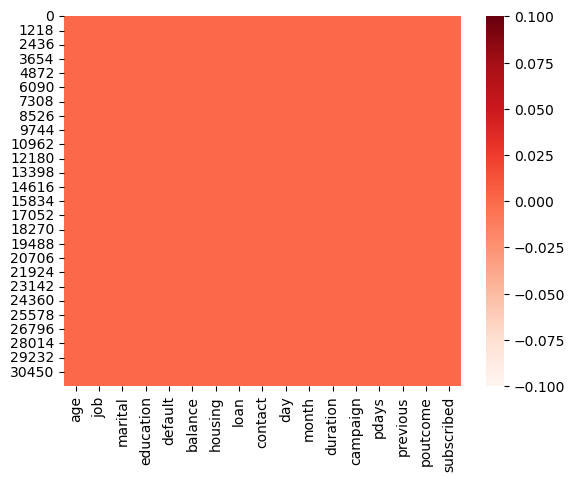

In [17]:
# Lets visualize the null values by heatmap

sns.heatmap(df.isnull(), cmap='Reds')
plt.show()

Here we can see no null values present

In [18]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('\n')

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


default
no     31062
yes      585
Name: default, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: balance, Length: 6326, dtype: int64


housing
yes    17584
no     14063
Name: housing, dty

In [19]:
# Seperating Numerical column and Categorical column
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# print the numerical and categorical columns
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


In [20]:
for col in df.columns:
    print(col, df[col].unique())

age [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]
job ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital ['married' 'divorced' 'single']
education ['unknown' 'secondary' 'tertiary' 'primary']
default ['no' 'yes']
balance [1933    3  891 ... 2787 8741 2968]
housing ['no' 'yes']
loan ['no' 'yes']
contact ['telephone' 'cellular' 'unknown']
day [19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23]
month ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
duration [  44   91  240 ...  939  839 1973]
campaign [ 2  1  3  4  7  5 33 12  8  9  6 24 17 11 20 25 19 29 21 10 27 38 16 18
 14 30 13 15 63 23 31 43 35 22 34 28 26 41 37 50 55 32 44 36

# Description Of Data

In [21]:
# Statistical summary of numerical columns
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


This is the statistical presentation of dataset. Here the summary of the numerical columns in the datasets looks reasonable and within limit as there is no missing values present.

Here is description:

1.Count: It represents the number of non-null values in each column of the dataset. In this case, there are 31,647 non-null values in each column.

2.Mean: It represents the average value of each column. For instance, the average age of the customers is approximately 41 years.

3.Std: It represents the standard deviation of each column. The standard deviation is a measure of how dispersed the data is from the mean. In other words, it shows how much the values in each column deviate from the average value.

4.Min: It represents the minimum value in each column. For example, the minimum age in the dataset is 18.

5.25%, 50%, and 75%: These values represent the quartiles of the data. The 25th percentile (also called the first quartile) means that 25% of the data falls below that value, and the rest is above it. The 50th percentile (also called the median) means that 50% of the data falls below that value, and the other 50% is above it. The 75th percentile (also called the third quartile) means that 75% of the data falls below that value, and the remaining 25% is above it.

6.Max: It represents the maximum value in each column. For instance, the maximum age in the dataset is 95.

# Data Visualization- Graphical Analysis

Univarate Analysis

 Lets visualize Numerical column by Histogram, Box plot and Density plot

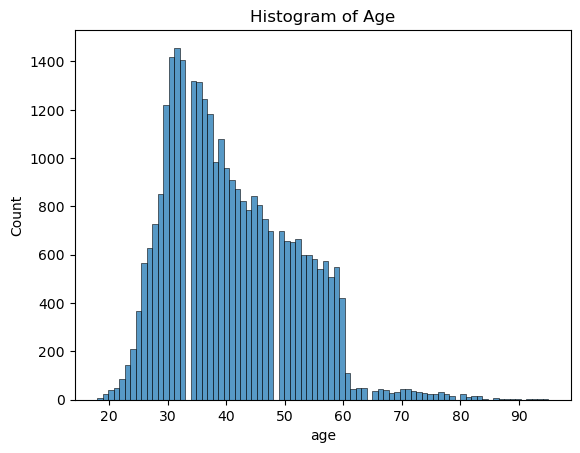

In [22]:
# Lets visualize 'age' column by hstogram plot

sns.histplot(data=df, x='age', kde=False)
plt.title('Histogram of Age')
plt.show()

Here we can see some right-skewness in the distribution.This means that the distribution is not perfectly symmetrical, and the mean age may be higher than the median age. We can see the peak at 30. Ans max holder are between 30-40 age

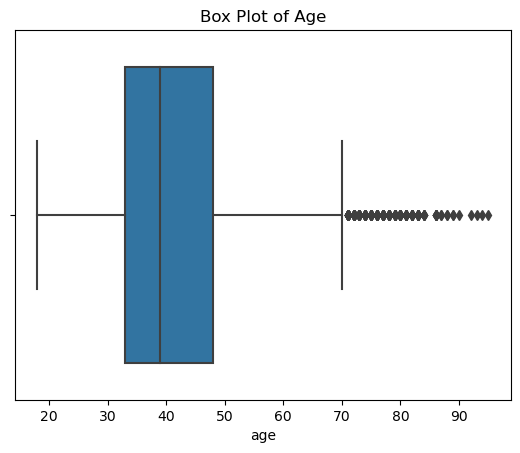

In [23]:
# Let's visualize 'age' column by box plot

sns.boxplot(data=df, x='age')
plt.title('Box Plot of Age')
plt.show()

Here we can see the outliers present in the 'age' column

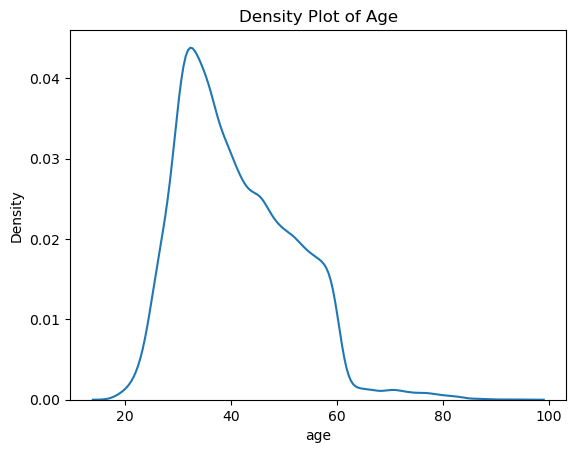

In [24]:
# Lets visualize 'age' column by density plot

sns.kdeplot(data=df, x='age')
plt.title('Density Plot of Age')
plt.show()

Here also we can see the same observation as histogram

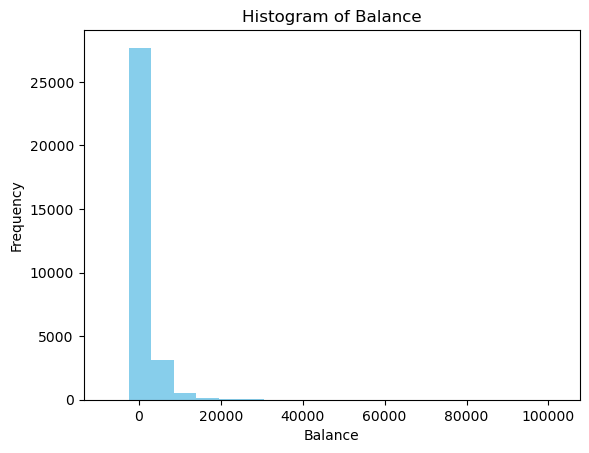

In [25]:
# Lets visualize 'balance' column by hstogram plot

plt.hist(df['balance'], bins=20, color='skyblue')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

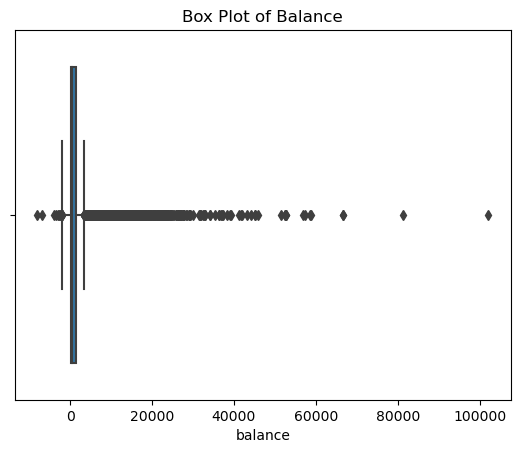

In [26]:
# Let's visualize 'balance' column by box plot

sns.boxplot(data=df, x='balance')
plt.title('Box Plot of Balance')
plt.show()

In the balance column we can see lots of outliers are present

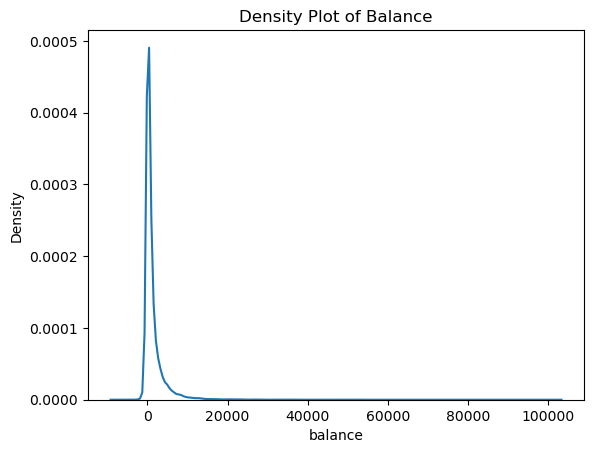

In [27]:
# Lets visualize 'balance' column by density plot

sns.kdeplot(data=df, x='balance')
plt.title('Density Plot of Balance')
plt.show()

We can see in both the plot of balance column that the majority of the values are concentrated towards the left side of the x-axis, indicating that most people have low account balances. We can also see the heavely righ-skeweness in the distribution

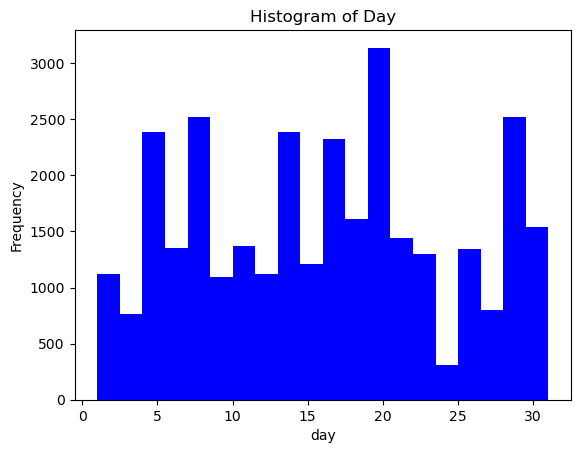

In [28]:
# Lets visualize 'day' column by hstogram plot

plt.hist(df['day'], bins=20, color='blue')
plt.xlabel('day')
plt.ylabel('Frequency')
plt.title('Histogram of Day')
plt.show()

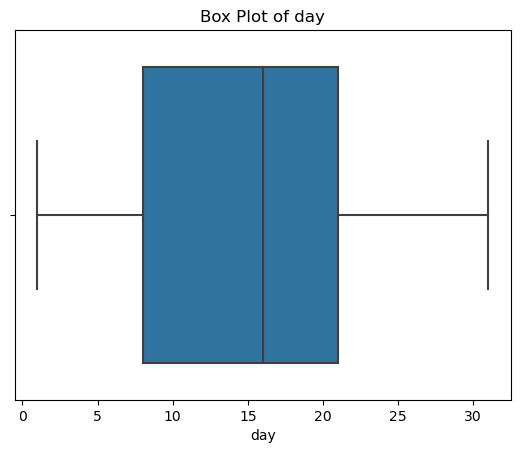

In [29]:
# Let's visualize 'day' column by box plot

sns.boxplot(data=df, x='day')
plt.title('Box Plot of day')
plt.show()

No outlier are present

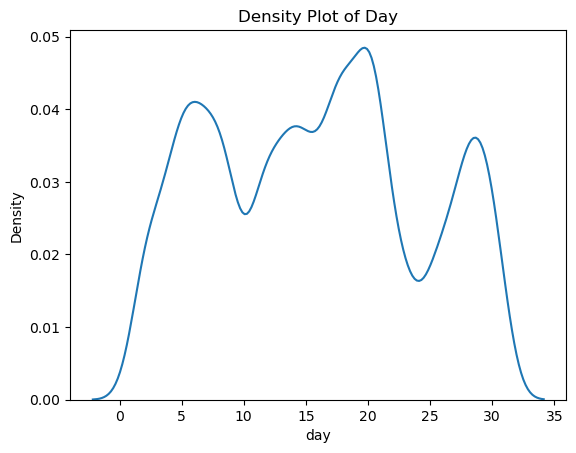

In [30]:
# Lets visualize 'day' column by density plot

sns.kdeplot(data=df, x='day')
plt.title('Density Plot of Day')
plt.show()

Here in both the plots of 'day'column we can see we can see that the distribution is relatively uniform. 

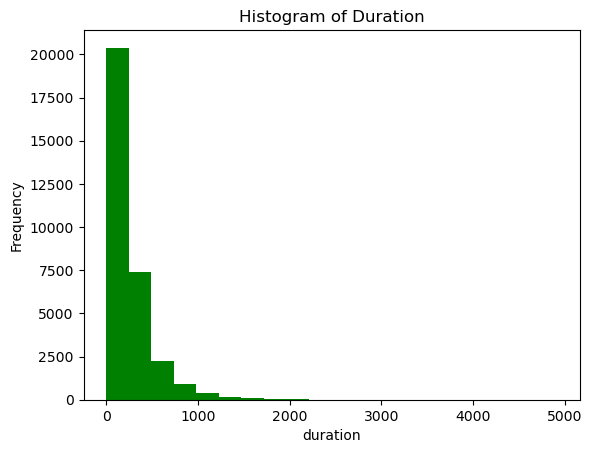

In [31]:
# Lets visualize 'duration' column by hstogram plot

plt.hist(df['duration'], bins=20, color='green')
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

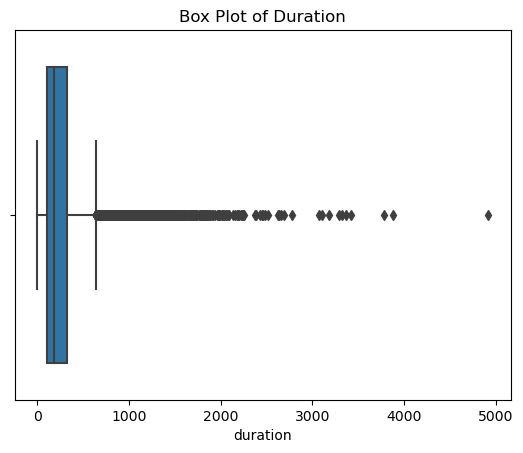

In [32]:
# Let's visualize 'duration' column by box plot

sns.boxplot(data=df, x='duration')
plt.title('Box Plot of Duration')
plt.show()

Here we can see the outliers are present

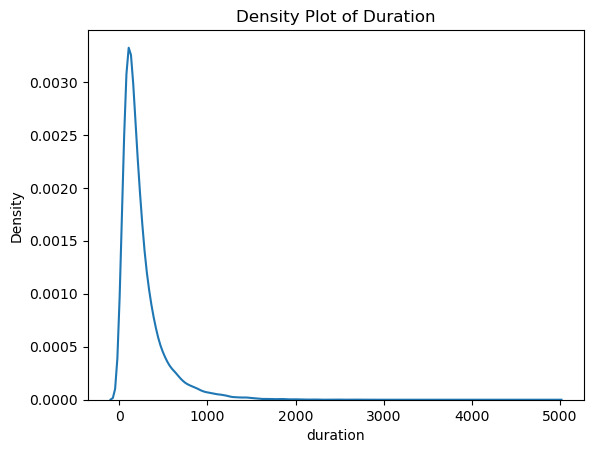

In [33]:
# Lets visualize 'duration' column by density plot

sns.kdeplot(data=df, x='duration')
plt.title('Density Plot of Duration')
plt.show()

We can see in both the plot of duration column that the majority of the values are concentrated towards the left side of the x-axis. We can also see the heavely righ-skeweness in the distribution.

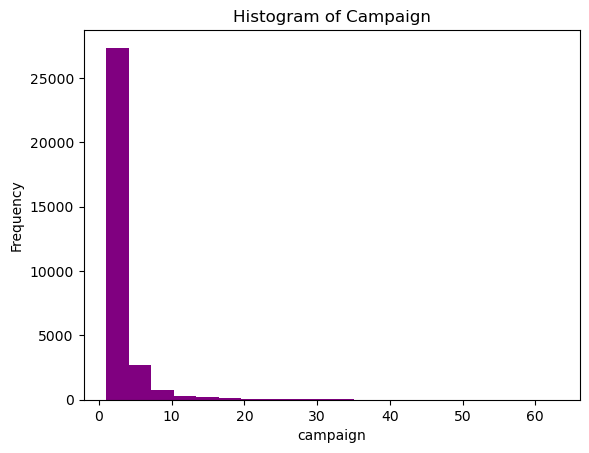

In [34]:
# Lets visualize 'campaign' column by hstogram plot

plt.hist(df['campaign'], bins=20, color='purple')
plt.xlabel('campaign')
plt.ylabel('Frequency')
plt.title('Histogram of Campaign')
plt.show()

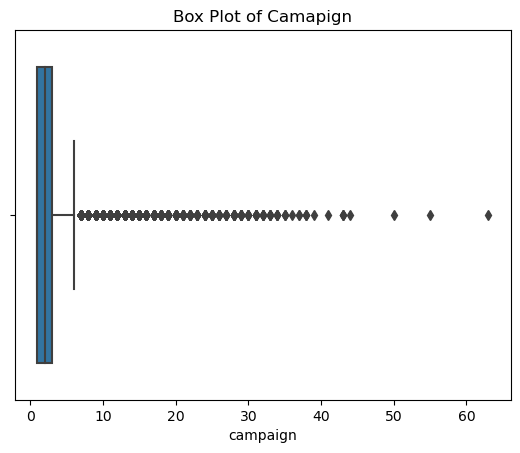

In [35]:
# Let's visualize 'campaign' column by box plot

sns.boxplot(data=df, x='campaign')
plt.title('Box Plot of Camapign')
plt.show()

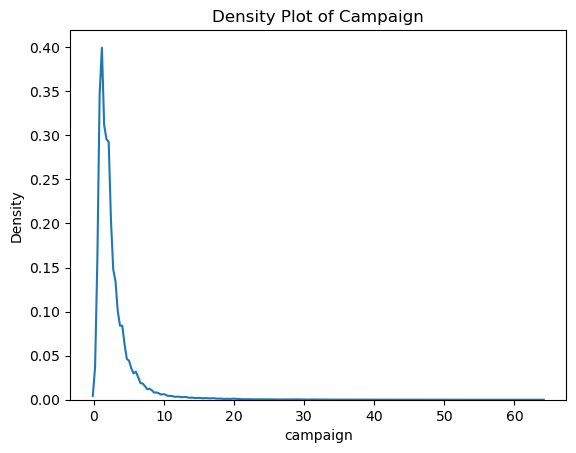

In [36]:
# Lets visualize 'campaign' column by density plot

sns.kdeplot(data=df, x='campaign')
plt.title('Density Plot of Campaign')
plt.show()

We can see in both the plot of campaign column that the majority of the values are concentrated towards the left side of the x-axis. We can also see the heavely righ-skeweness in the distribution

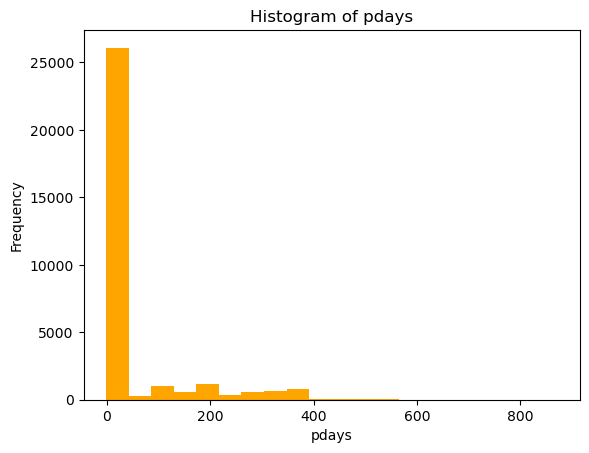

In [37]:
# Lets visualize 'pdays' column by hstogram plot

plt.hist(df['pdays'], bins=20, color='orange')
plt.xlabel('pdays')
plt.ylabel('Frequency')
plt.title('Histogram of pdays')
plt.show()

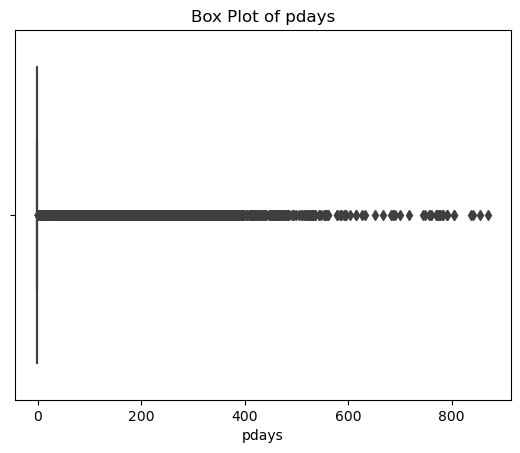

In [38]:
# Let's visualize 'pdays' column by box plot

sns.boxplot(data=df, x='pdays')
plt.title('Box Plot of pdays')
plt.show()

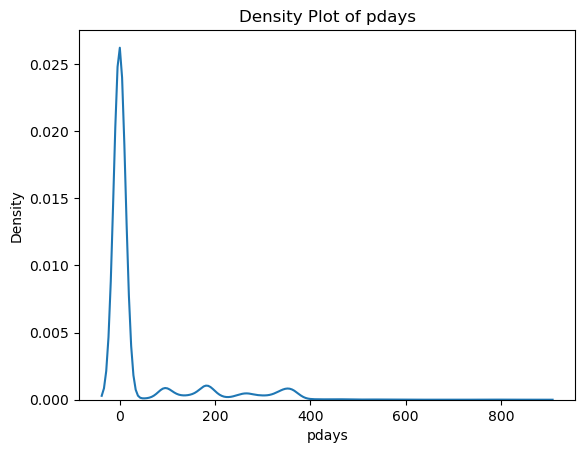

In [39]:
# Lets visualize 'pdays' column by density plot

sns.kdeplot(data=df, x='pdays')
plt.title('Density Plot of pdays')
plt.show()

We can see in both the plot of pdays column that the majority of the values are concentrated towards the left side of the x-axis. We can also see the heavely righ-skeweness in the distribution

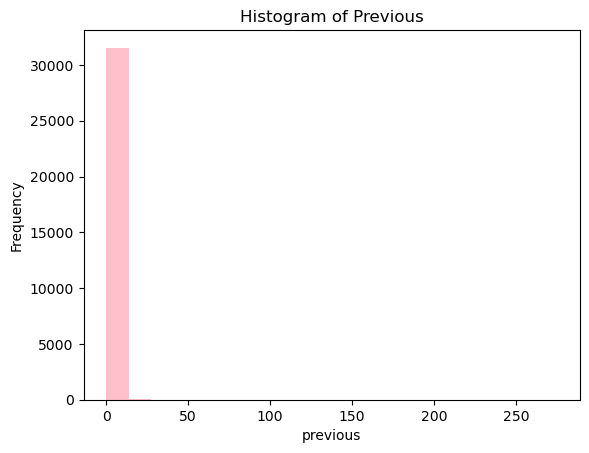

In [40]:
# Lets visualize 'previous' column by hstogram plot

plt.hist(df['previous'], bins=20, color='pink')
plt.xlabel('previous')
plt.ylabel('Frequency')
plt.title('Histogram of Previous')
plt.show()

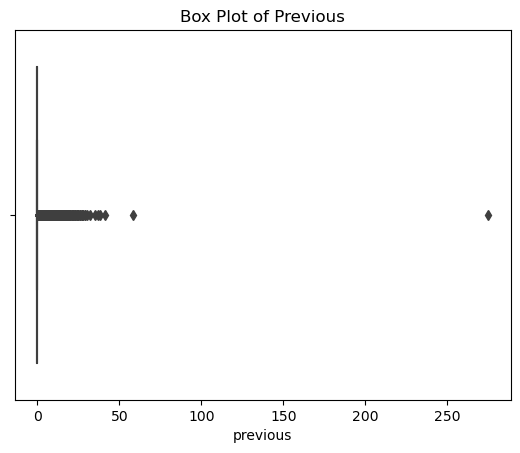

In [41]:
# Let's visualize 'previous' column by box plot

sns.boxplot(data=df, x='previous')
plt.title('Box Plot of Previous')
plt.show()

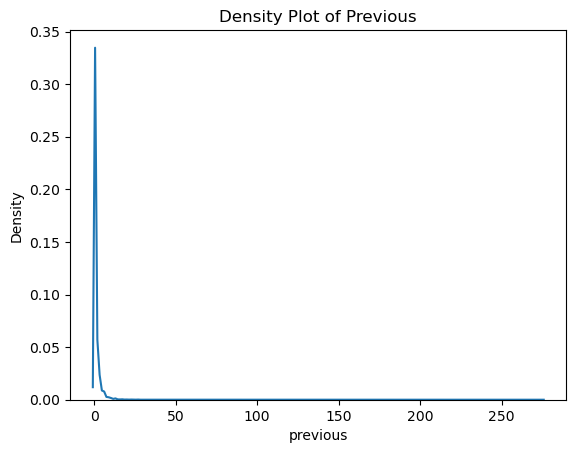

In [42]:
# Lets visualize 'previous' column by density plot

sns.kdeplot(data=df, x='previous')
plt.title('Density Plot of Previous')
plt.show()

We can see in both the plot of previous column that the majority of the values are concentrated towards the left side of the x-axis. We can also see the heavely righ-skeweness in the distribution.

We observed in most of the numerical column that data is heavely right skewed and lots of outliers are present.

Let's visualize categorical column by Bar plot 

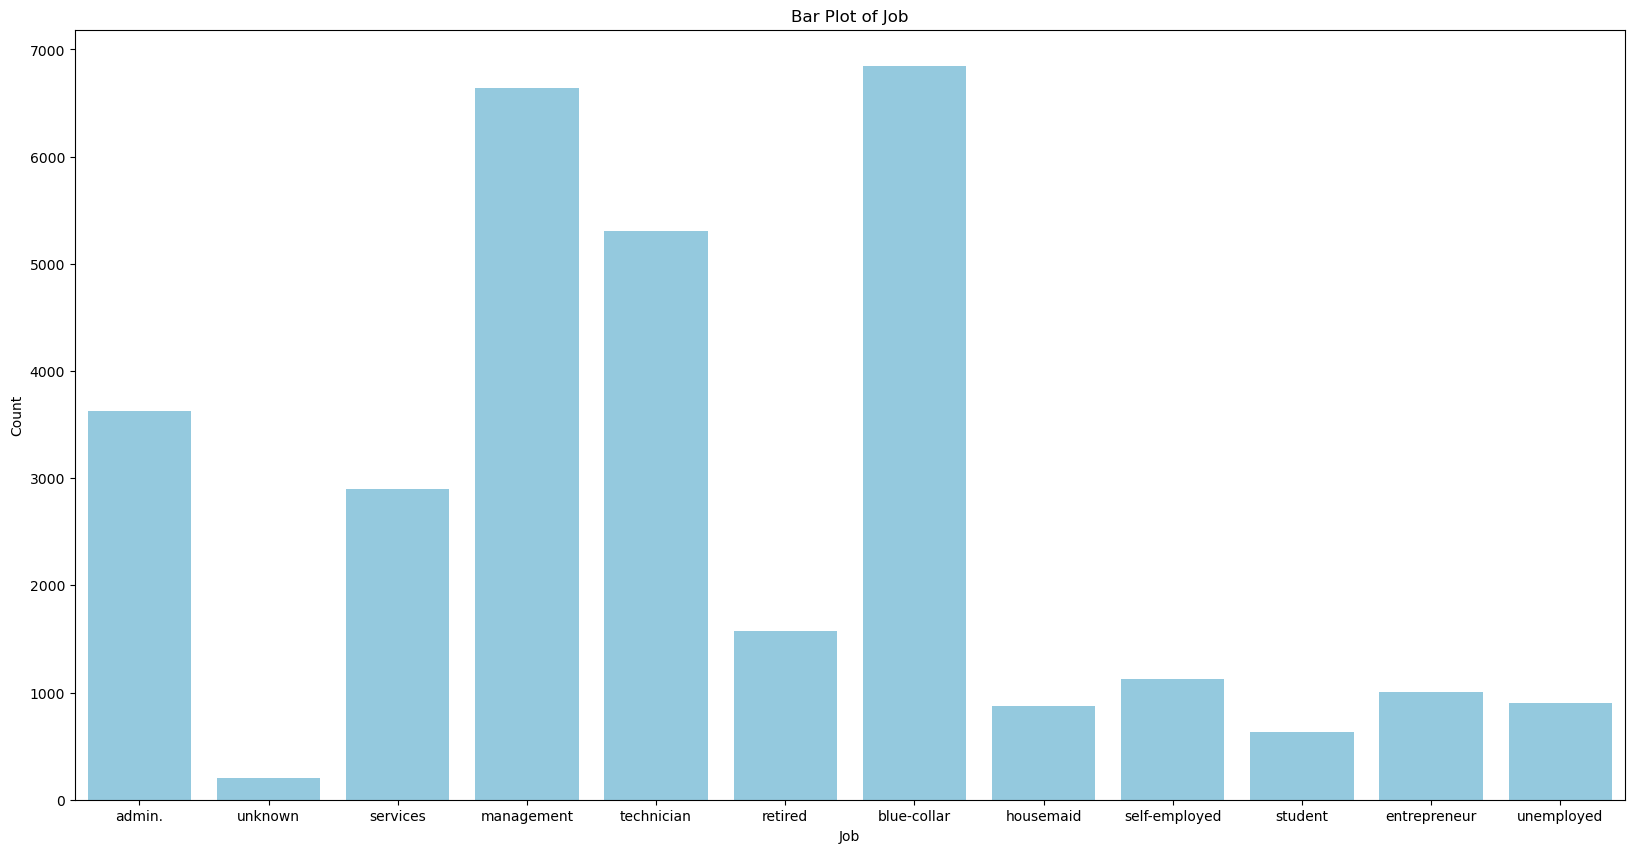

In [43]:
# Let's visualize the 'job' column by bar plot

plt.figure(figsize=(20,10))
sns.countplot(x='job', data=df, color='skyblue')
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Bar Plot of Job')
plt.show()

Here in this count plot we can see the count of people with blue-collar job is the highest followed by management with quite a difference technician

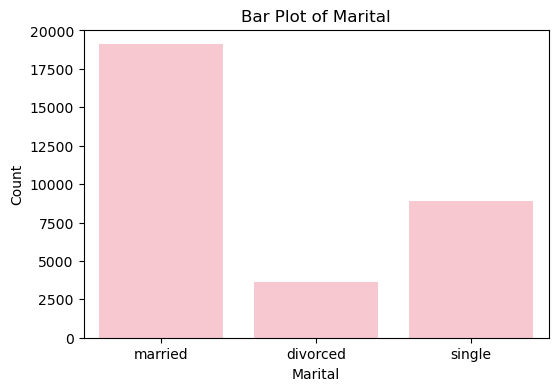

In [44]:
# Let's visualize the 'marital' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='marital', data=df, color='pink')
plt.xlabel('Marital')
plt.ylabel('Count')
plt.title('Bar Plot of Marital')
plt.show()

Here in this count plot of marital column, we can see the count of married is higest followed by single and then divorced

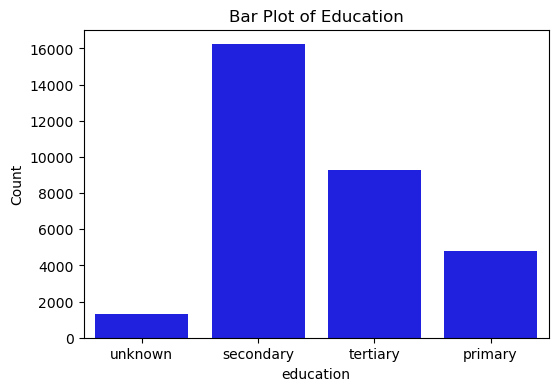

In [45]:
# Let's visualize the 'education' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='education', data=df, color='blue')
plt.xlabel('education')
plt.ylabel('Count')
plt.title('Bar Plot of Education')
plt.show()

Here in this analysis plot of education column we can see the count of people with secondary education is the highest followed by tertiary and then primary

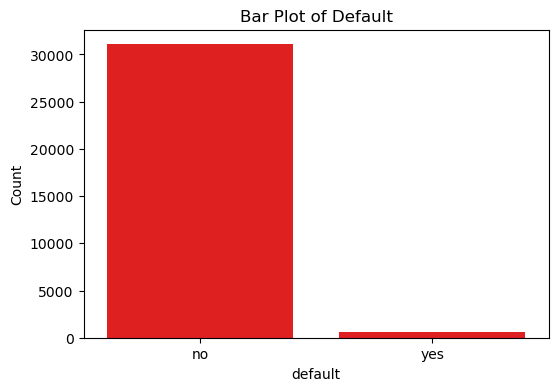

In [46]:
# Let's visualize the 'default' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='default', data=df, color='red')
plt.xlabel('default')
plt.ylabel('Count')
plt.title('Bar Plot of Default')
plt.show()

Here in this analysis plot of default column we can see the count of no defaulter are more then yes

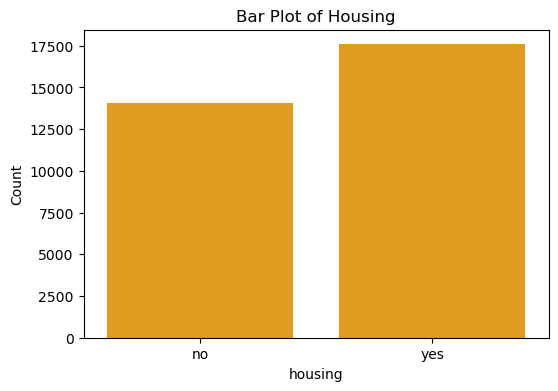

In [47]:
# Let's visualize the 'housing' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='housing', data=df, color='orange')
plt.xlabel('housing')
plt.ylabel('Count')
plt.title('Bar Plot of Housing')
plt.show()

Here in the analysis plot of housing column we can see count of yes is more than no

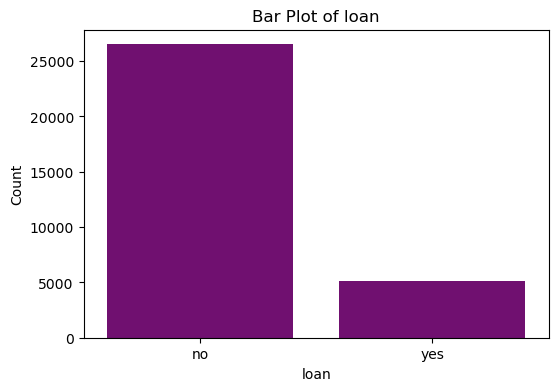

In [48]:
# Let's visualize the 'loan' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='loan', data=df, color='purple')
plt.xlabel('loan')
plt.ylabel('Count')
plt.title('Bar Plot of loan')
plt.show()

Here in this analysis plot of loan column, the count of No is more than yes

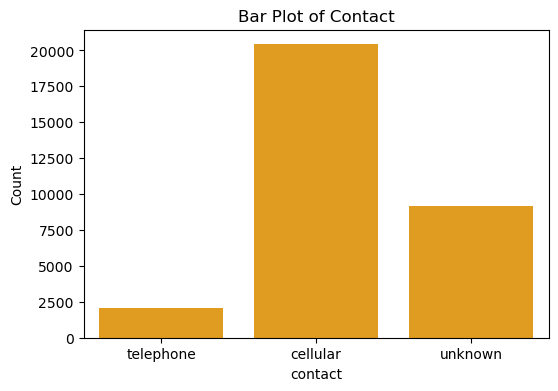

In [49]:
# Let's visualize the 'contact' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='contact', data=df, color='orange')
plt.xlabel('contact')
plt.ylabel('Count')
plt.title('Bar Plot of Contact')
plt.show()

Here in this analysis plot of contact column we can see the count of cellular is the highest followed by unknown and then telephone

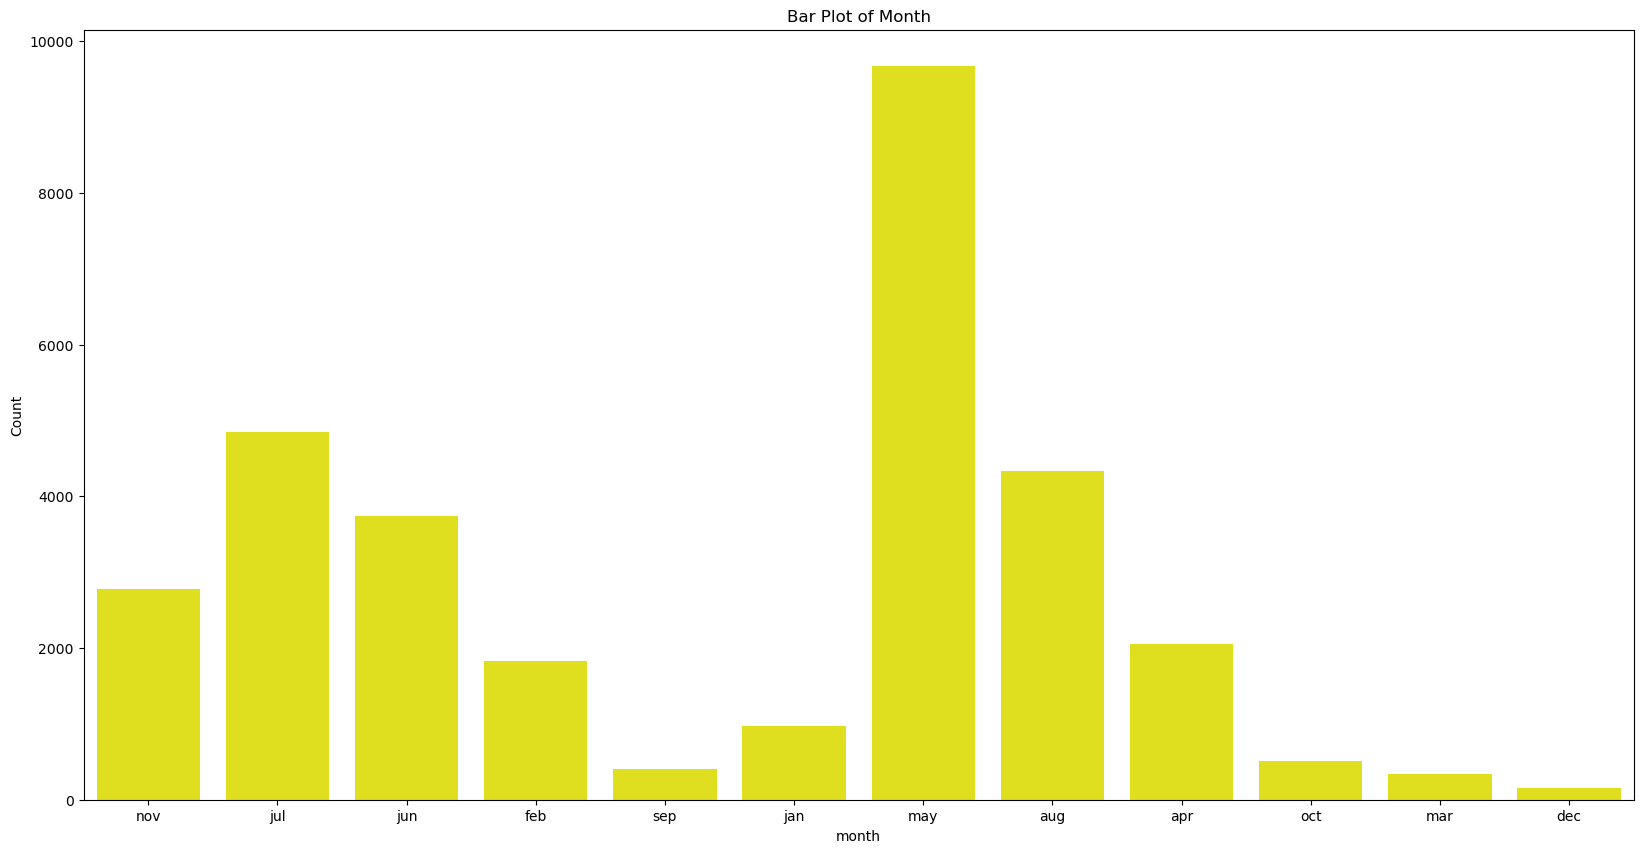

In [50]:
# Let's visualize the 'month' column by bar plot

plt.figure(figsize=(20,10))
sns.countplot(x='month', data=df, color='yellow')
plt.xlabel('month')
plt.ylabel('Count')
plt.title('Bar Plot of Month')
plt.show()

Here in the analysis plot of month column we can see count of people in may month is the highest and dec is the least.

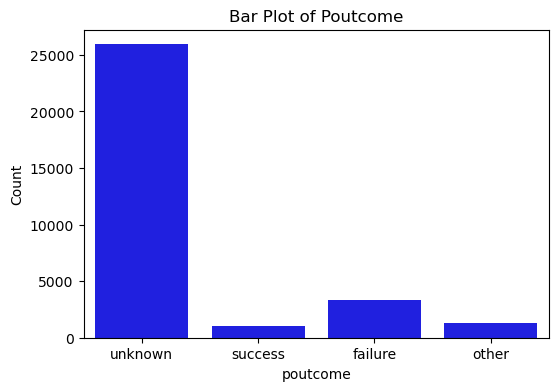

In [51]:
# Let's visualize the 'poutcome' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='poutcome', data=df, color='blue')
plt.xlabel('poutcome')
plt.ylabel('Count')
plt.title('Bar Plot of Poutcome')
plt.show()

Here in this analysis plot of poutcome column,unknown has the highest count.

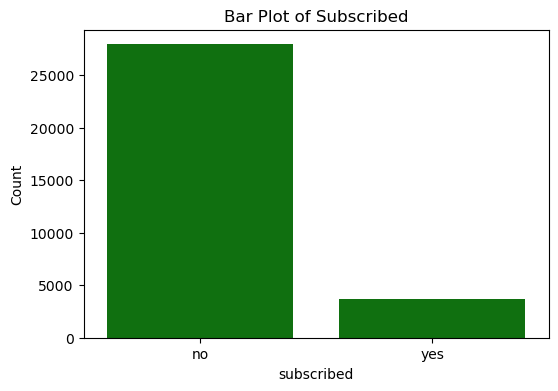

In [52]:
# Let's visualize the 'subscribed' column by bar plot

plt.figure(figsize=(6,4))
sns.countplot(x='subscribed', data=df, color='green')
plt.xlabel('subscribed')
plt.ylabel('Count')
plt.title('Bar Plot of Subscribed')
plt.show()

Here in the analysis plot of subscribed column we can see the people with no subscription is more than yes

Bivariate Analysis

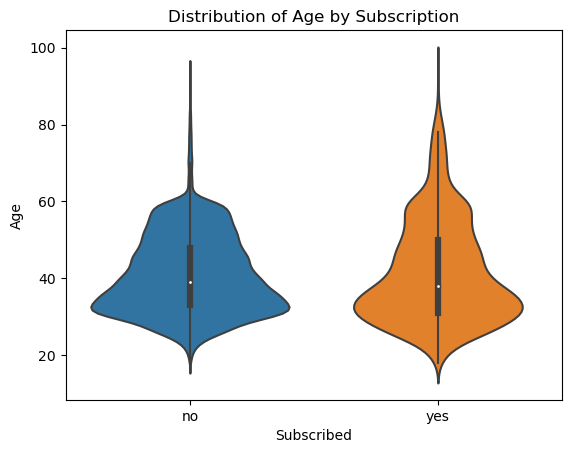

In [53]:
# Lets analyze the relation between 'age' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='age')
plt.xlabel('Subscribed')
plt.ylabel('Age')
plt.title('Distribution of Age by Subscription')
plt.show()

Here in this violin plot we can see that the median age for both categories is around 40 years old. We can see the distribution of not subscribed is more spread out than subscription one. We can conclude that age may have a slight influence on the subscription of a term deposit

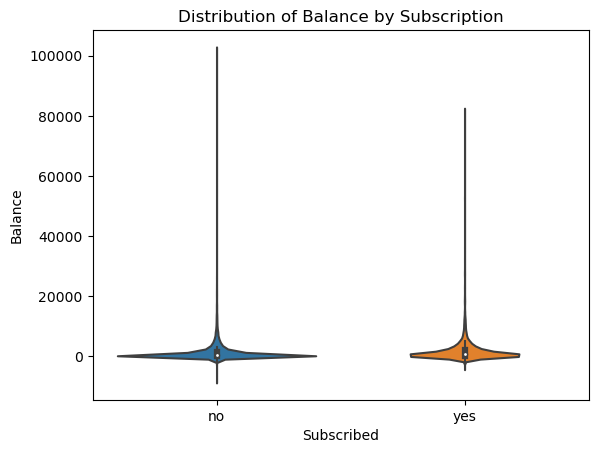

In [54]:
# Lets analyze the relation between 'balance' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='balance')
plt.xlabel('Subscribed')
plt.ylabel('Balance')
plt.title('Distribution of Balance by Subscription')
plt.show()

Here in this violin plot we can see that the the difference in width between the two groups is relatively small, and both groups have a similar distribution towards the median value.

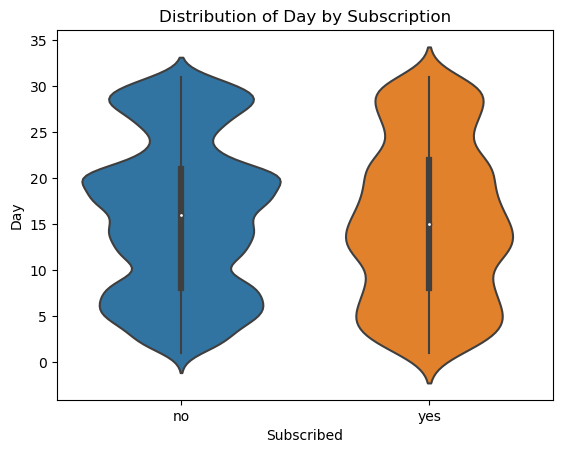

In [55]:
# Lets analyze the relation between 'day' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='day')
plt.xlabel('Subscribed')
plt.ylabel('Day')
plt.title('Distribution of Day by Subscription')
plt.show()

Here in ths violin plot we can see the median of no is slightly higher than yes

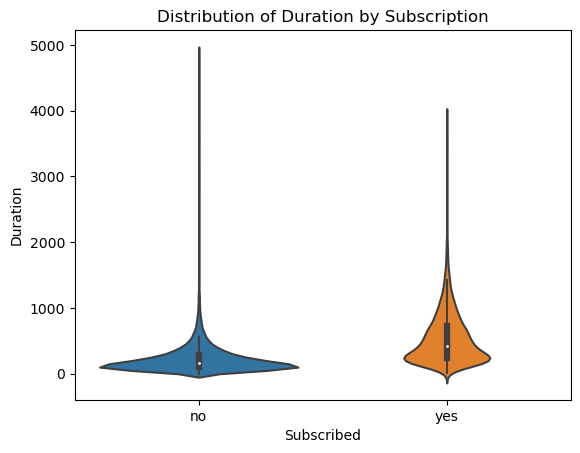

In [56]:
# Lets analyze the relation between 'duration' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='duration')
plt.xlabel('Subscribed')
plt.ylabel('Duration')
plt.title('Distribution of Duration by Subscription')
plt.show()

Here in this violin plot we can see the median point of yes is more than no, but distribution is more spread out at no

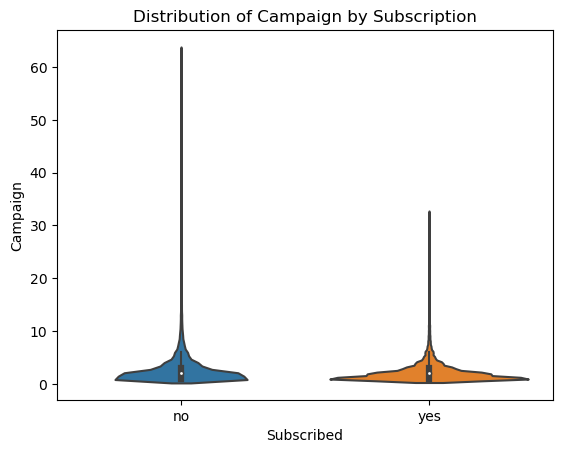

In [57]:
# Lets analyze the relation between 'campaign' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='campaign')
plt.xlabel('Subscribed')
plt.ylabel('Campaign')
plt.title('Distribution of Campaign by Subscription')
plt.show()

Here in this violin plot we can see the median foe both the option is almost same, but yes has more sprad out distribution than no

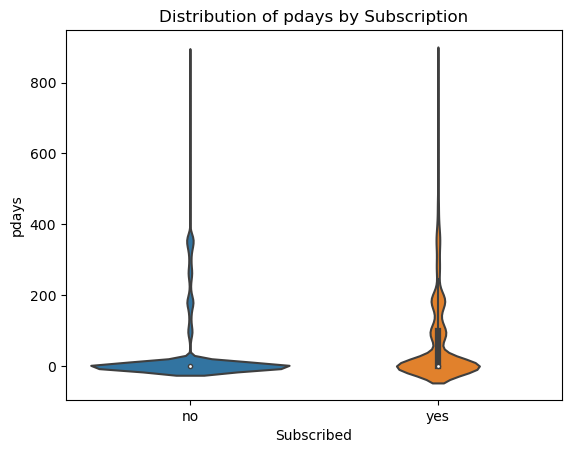

In [58]:
# Lets analyze the relation between 'pdays' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='pdays')
plt.xlabel('Subscribed')
plt.ylabel('pdays')
plt.title('Distribution of pdays by Subscription')
plt.show()

'pdays' (number of days that passed by after the client was last contacted from a previous campaign).

Here in this violin plot we can see that the distribution of customer who didn't subscribe to the term deposit s more spread out

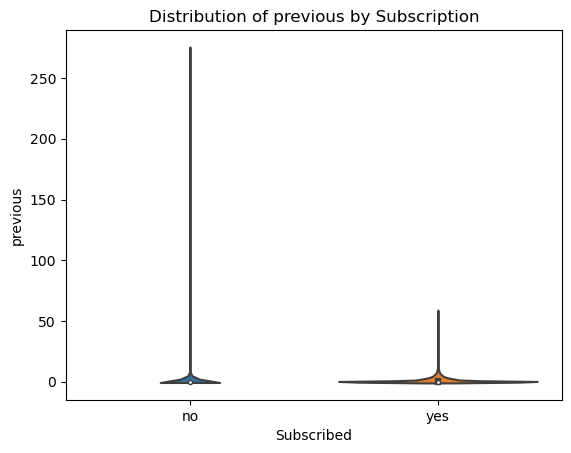

In [59]:
# Lets analyze the relation between 'previous' and 'subscribed' column

sns.violinplot(data=df, x='subscribed', y='previous')
plt.xlabel('Subscribed')
plt.ylabel('previous')
plt.title('Distribution of previous by Subscription')
plt.show()

'previous' column (number of contacts performed before this campaign and for this client).

Here in this violin plot we can see that the distribution of 'previous' is higher for customers who subscribed to the term deposit ('yes') compared to those who did not ('no').

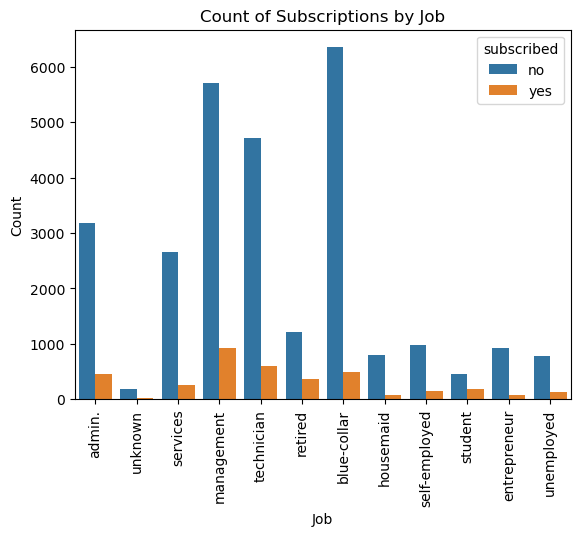

In [60]:
# Analyze the relation between 'job' vs 'subscribed' by count plot

sns.countplot(data=df, x='job', hue='subscribed')
plt.xticks(rotation=90)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Count of Subscriptions by Job')
plt.show()

Here in this bar plot we can see that the top three job categories with the highest count of subscriptions are "blue-collar", "management", and "technician". We can also see that the percentage of customers who subscribed is generally lower than those who did not across all job categories. 

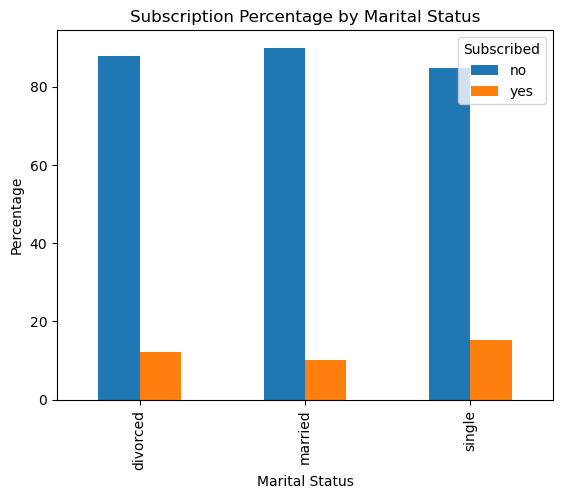

In [61]:
# Analyze the relation between 'marital' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['marital'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by Marital Status')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here in this bar plot we can see the marital column is divided into three categories and each category have subscriber, and non-subscriber. And in each individual category we can non-subscriber are more than subscriber. But in married category subscriber percentage is more than other two

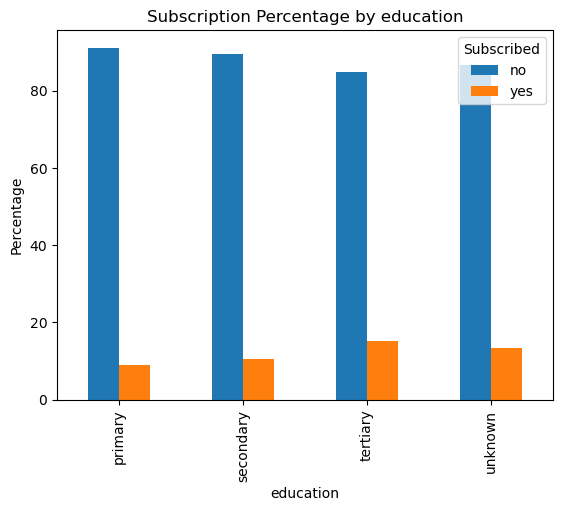

In [62]:
# Analyze the relation between 'education' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['education'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by education')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here in this bar plot we can see overall clients with tertiary education have highest percentage of subscription and lowest percentage of non-subscription and clients with primary education have least percent of subscription and highest percentage of non-subscription

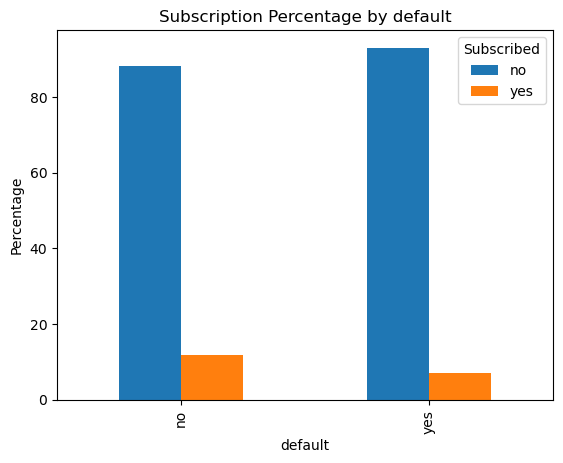

In [63]:
# Analyze the relation between 'default' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['default'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('default')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by default')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here is this plot we can see that who have not defaulted have a higher percentage of subscription and lower percentage of non-subscription then who defaulted. 

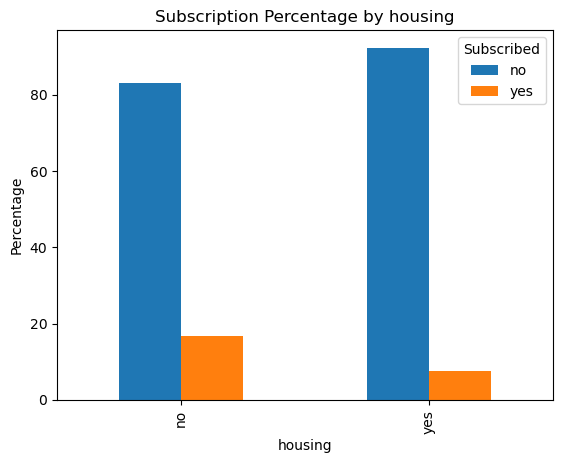

In [64]:
# Analyze the relation between 'education' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['housing'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by housing')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here, in this bar plot we can see that the percentage of subscribers is higher among those who do not have a housing loan (no), while the percentage of non-subscribers is higher among those who have a housing loan (yes).

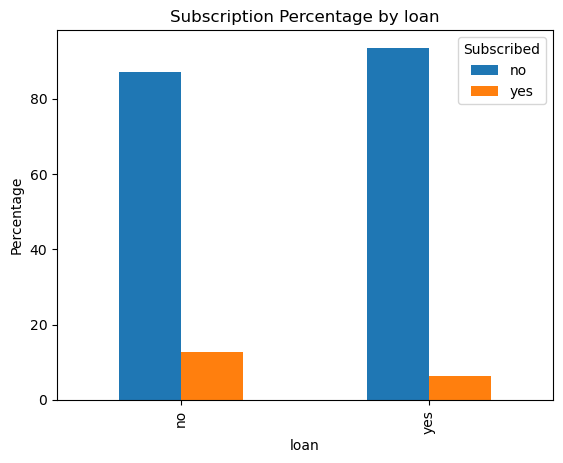

In [65]:
# Analyze the relation between 'loan' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['loan'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('loan')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by loan')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here, in this bar plot we can see that the percentage of subscribers is higher among those who do not have a personal loan (no), while the percentage of non-subscribers is higher among those who does have a personal loan (yes).

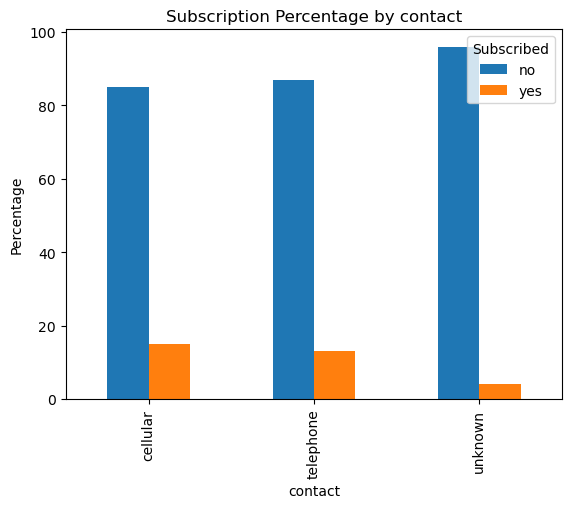

In [66]:
# Analyze the relation between 'contact' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['contact'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('contact')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by contact')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here in this plot we can see the percentage of subscribers and non-subscribers in each category of the 'contact' column,where non-subscribers are more in each individual column then subscriber

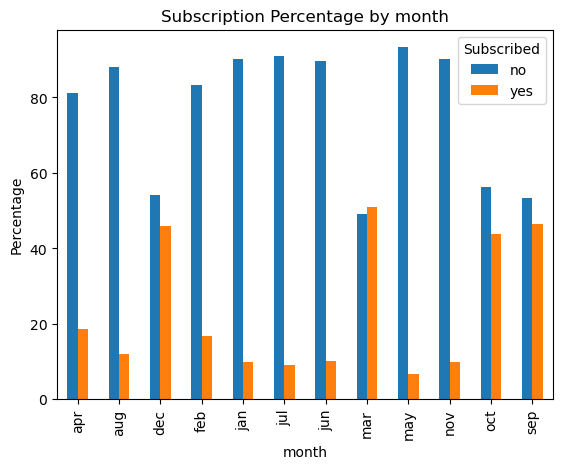

In [67]:
# Analyze the relation between 'month' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['month'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('month')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by month')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here in this plot we can see that the percentage of subscriber in march month is the highest and may is the least and vice versa

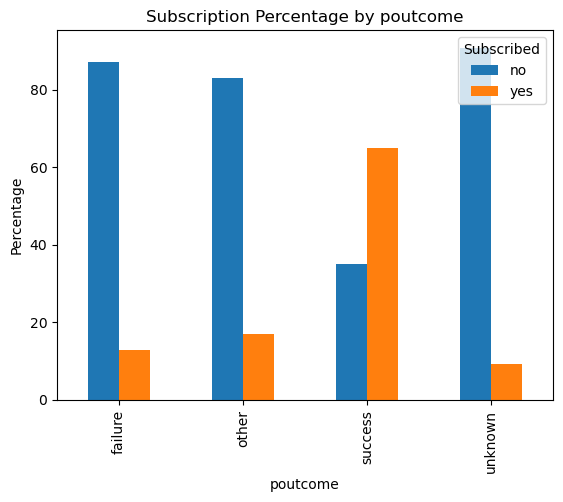

In [68]:
# Analyze the relation between 'poutcome' vs 'subscribed' by percentage bar plot

cross_tab = pd.crosstab(df['poutcome'], df['subscribed'], normalize='index')*100
cross_tab.plot(kind='bar')
plt.xlabel('poutcome')
plt.ylabel('Percentage')
plt.title('Subscription Percentage by poutcome')
plt.legend(title='Subscribed', loc='upper right')
plt.show()

Here in this plot  we can observe that customers who had a successful outcome in the previous campaign are more likely to subscribe to a term deposit. This can be seen as the percentage of subscribers is higher than non-subscribers for the 'success' category.

 Multivariate Analysis

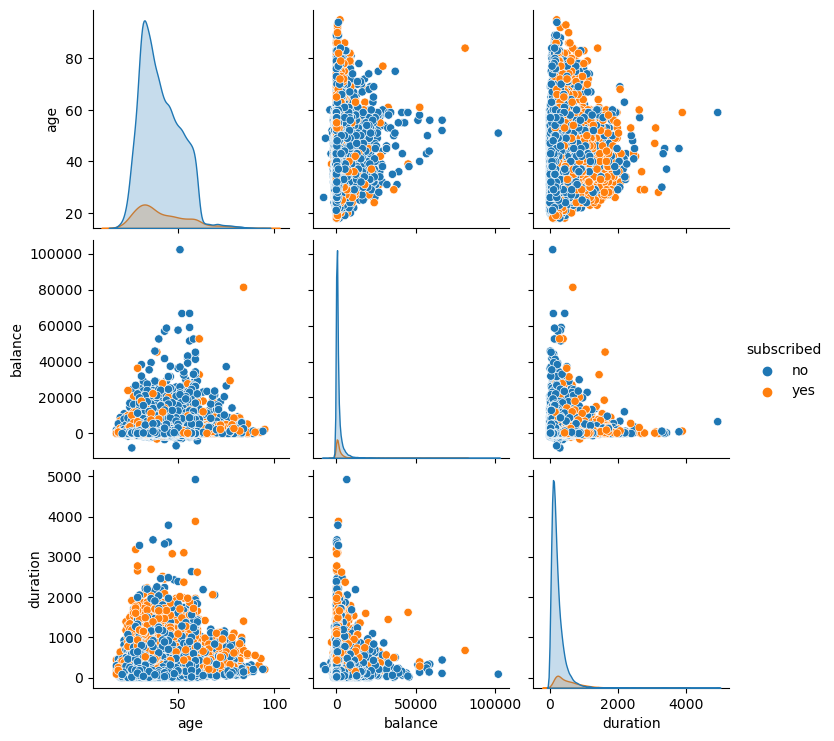

In [69]:
# Lets analyze relationship of numerical column with target variable more clearly with multivariate analysis

sns.pairplot(data=df, vars=['age', 'balance', 'duration'], hue='subscribed')
plt.show()

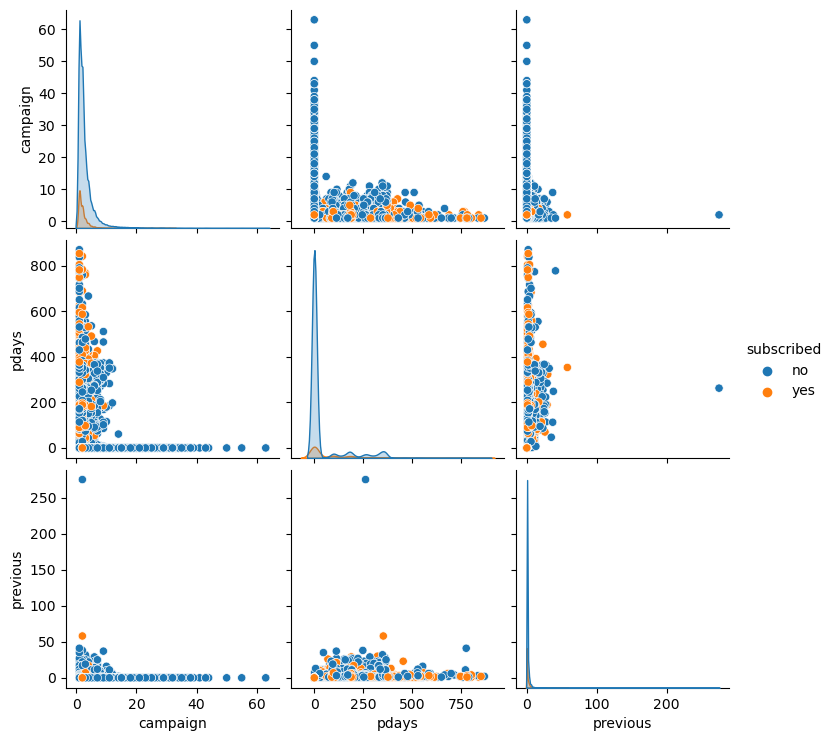

In [70]:
sns.pairplot(data=df, vars=['campaign', 'pdays', 'previous'], hue='subscribed')
plt.show()

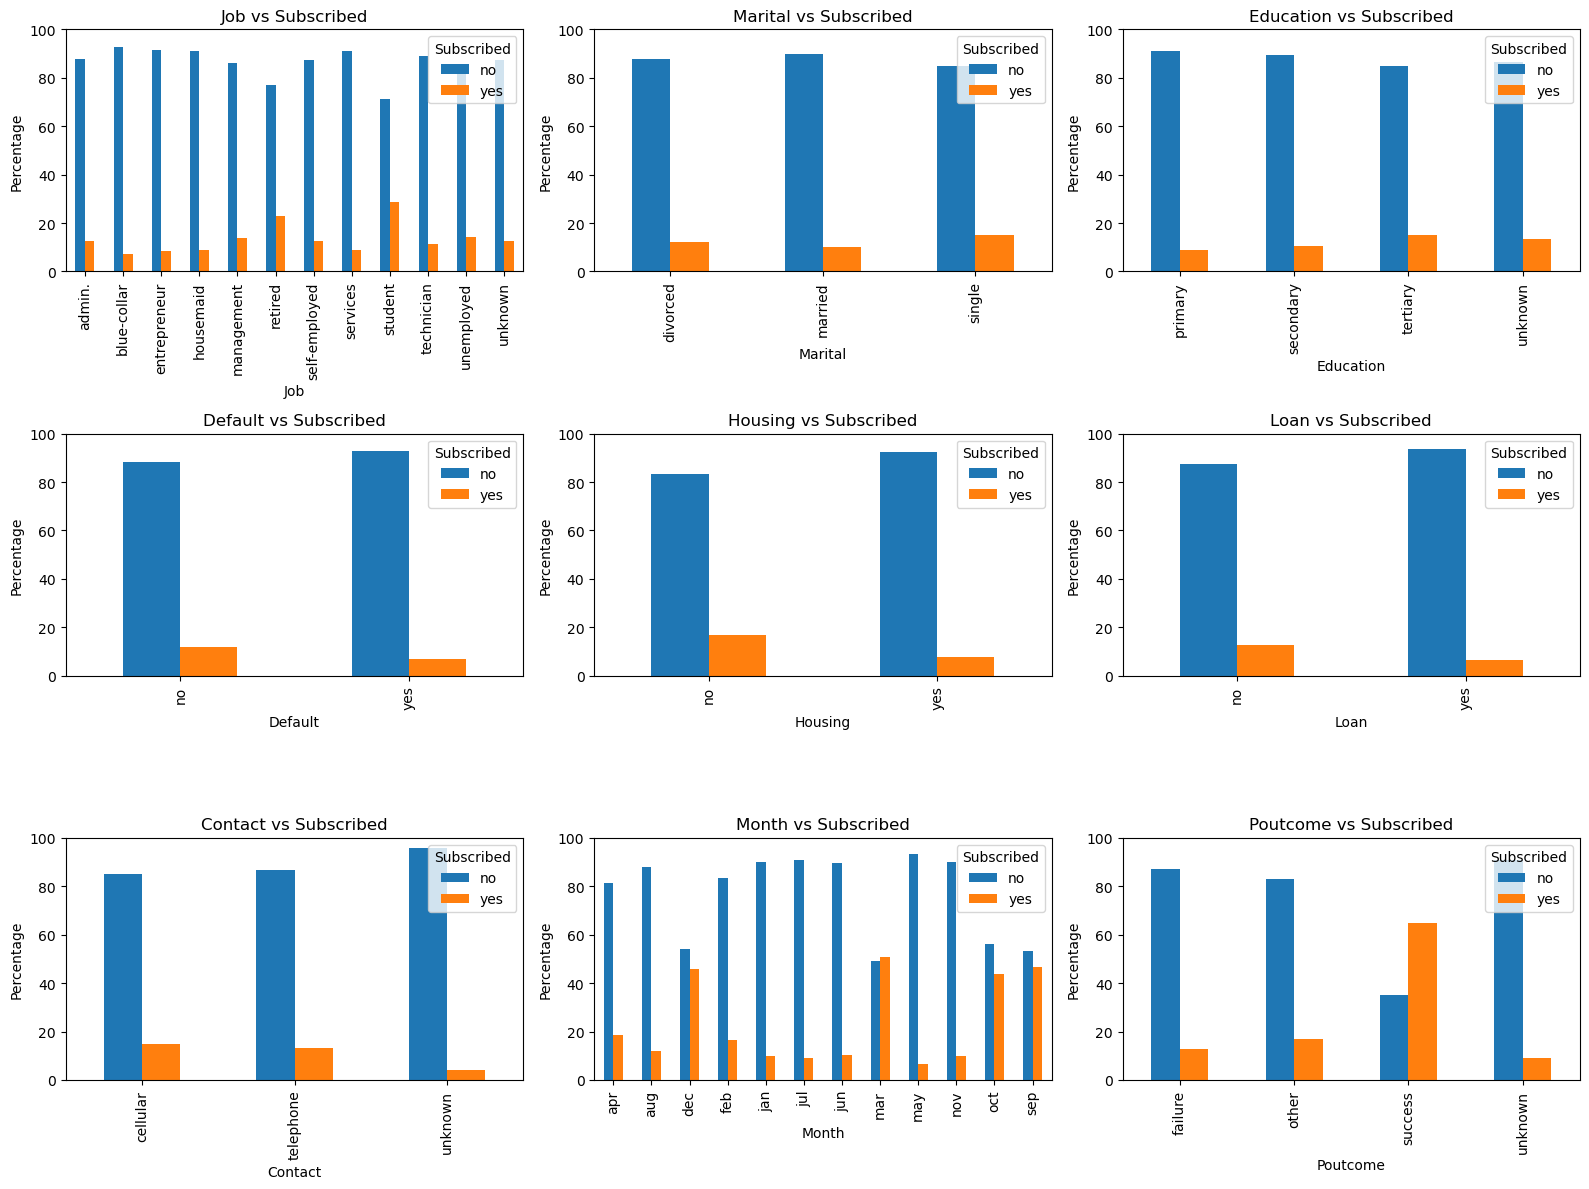

In [71]:
# lets analyze relationship between categorical column and target variable more clearly with ,ultivarite analysis
# Create a list of categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create a subplot for each column
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axs = axs.flatten()

# Iterate over each column and create a clustered bar chart
for i, col in enumerate(cat_cols):
    cross_tab = pd.crosstab(df[col], df['subscribed'])
    cross_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab.plot(kind='bar', stacked=False, ax=axs[i])
    axs[i].set_title(f'{col.capitalize()} vs Subscribed')
    axs[i].set_xlabel(col.capitalize())
    axs[i].set_ylabel('Percentage')
    axs[i].legend(title='Subscribed', loc='upper right')
    axs[i].set_ylim([0, 100])

plt.tight_layout()
plt.show()

Here in this analysis we can see their is no such relationship is clear in numerical column plot with target variable, and mixed in categorical columns.

# Outliers

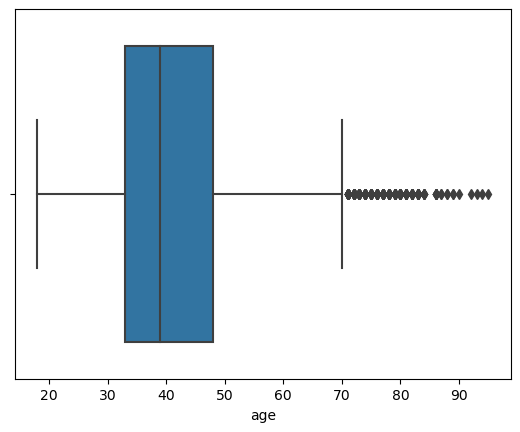

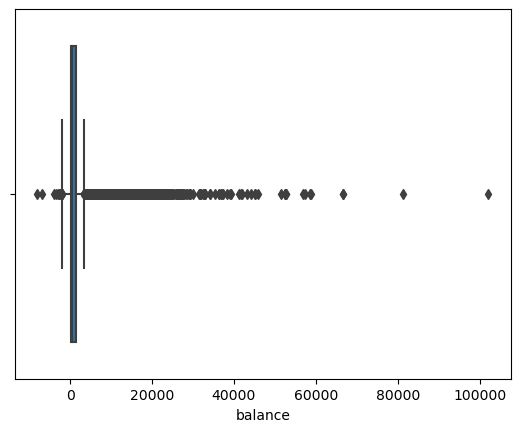

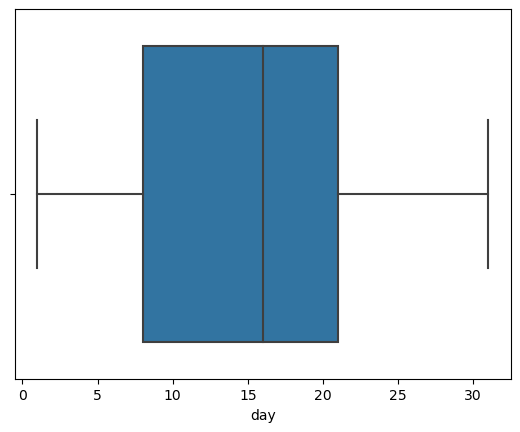

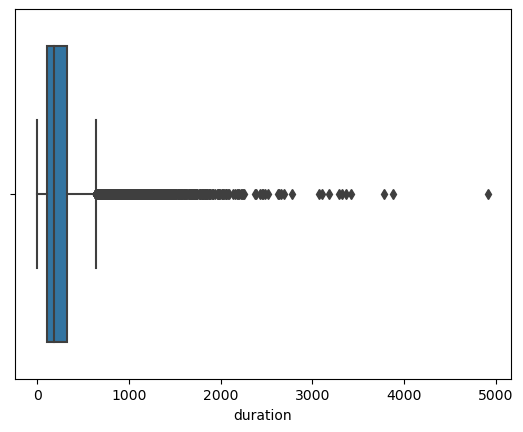

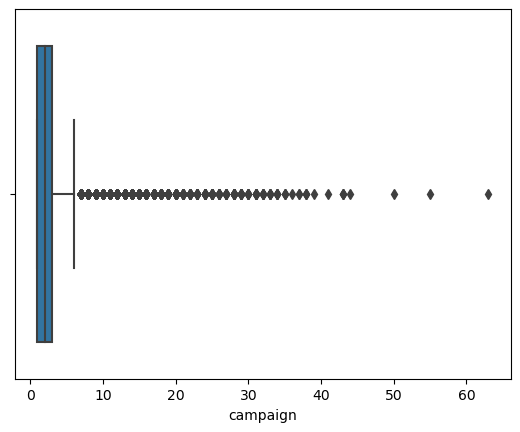

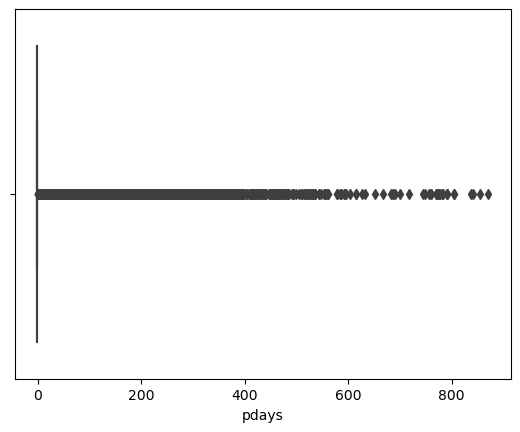

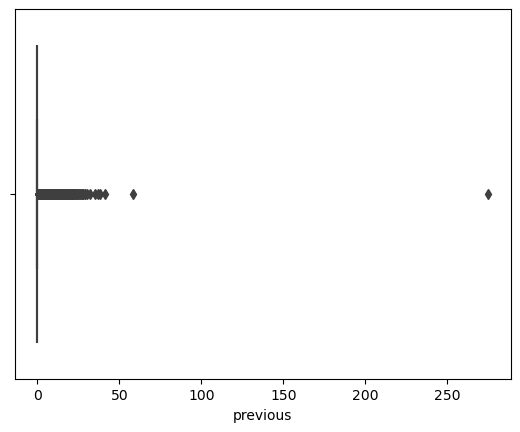

In [72]:
# Lets check the outliers

numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

As we can see here, all column except 'day' column, have outliers present

In [73]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

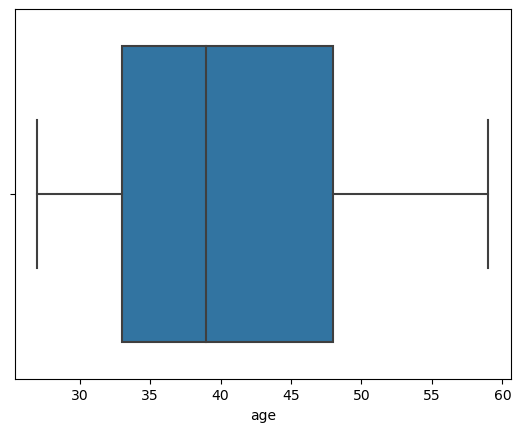

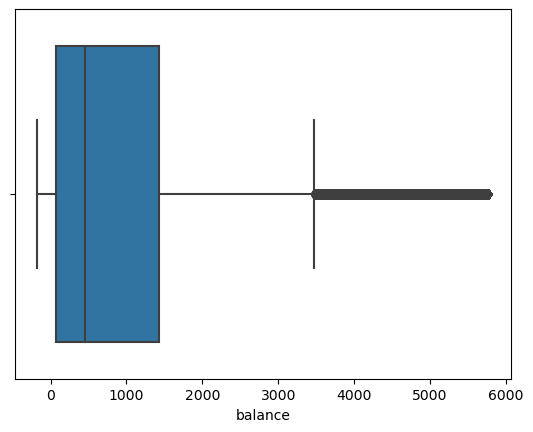

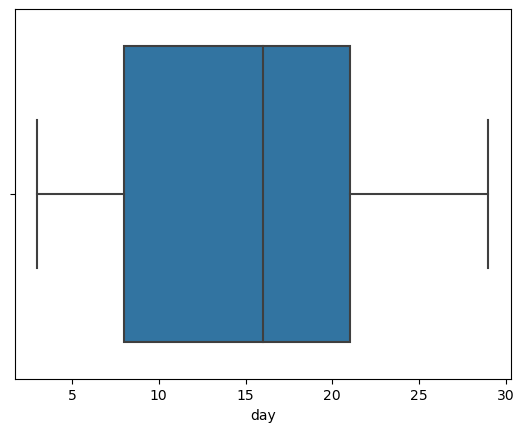

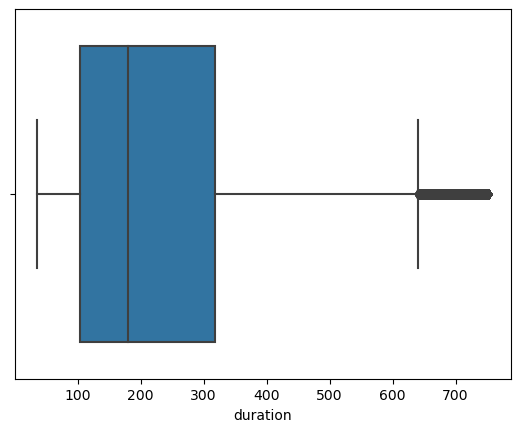

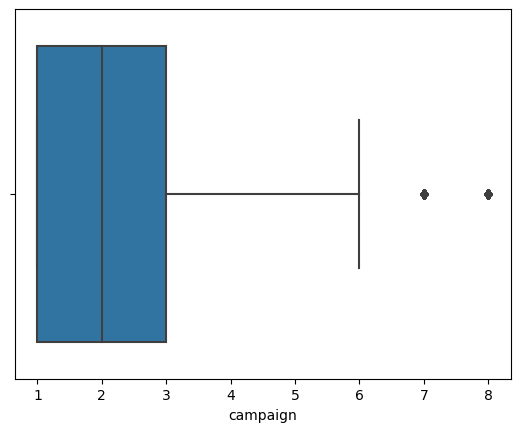

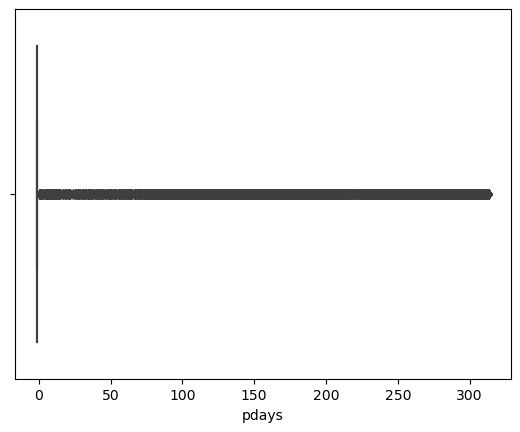

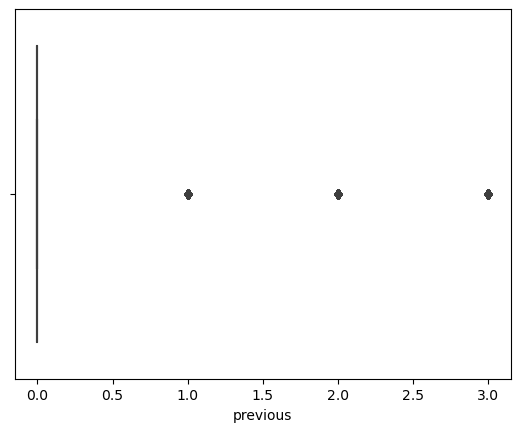

In [74]:
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [75]:
df.shape

(31647, 17)

In [76]:
# Count the number of observations in the original dataset
original_size = len(df)

# Count the number of observations in the treated dataset
treated_size = len(df)

# Calculate the data loss percentage
data_loss_percent = ((original_size - treated_size) / original_size) * 100
print(f"Data loss percentage: {data_loss_percent:.2f}%")

Data loss percentage: 0.00%


In [77]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

# Skewness

In [78]:
df.skew()

age         0.391082
balance     1.780036
day         0.075779
duration    1.299769
campaign    1.547660
pdays       2.237870
previous    2.230345
dtype: float64

In [79]:
from sklearn.preprocessing import PowerTransformer

# Define columns to transform
columns = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Apply Yeo-Johnson transformation to selected columns
pt = PowerTransformer(method='yeo-johnson')
df[columns] = pt.fit_transform(df[columns])

# Round transformed values to 2 decimal places
df[columns] = df[columns].round(2)

In [80]:
df.skew()

age         0.391082
balance     0.506088
day         0.075779
duration   -0.011470
campaign    0.202434
pdays       1.660778
previous    1.659726
dtype: float64

In [81]:
# Apply log transformation to pdays and previous columns
df['pdays'] = np.log(df['pdays'] + 1)
df['previous'] = np.log(df['previous'] + 1)

In [82]:
df.skew()

age         0.391082
balance     0.506088
day         0.075779
duration   -0.011470
campaign    0.202434
pdays       1.659173
previous    1.658817
dtype: float64

In [83]:
from scipy.stats import boxcox

# Apply Box-Cox transformation to 'pdays' and 'previous' columns
df['pdays'], _ = boxcox(df['pdays']+1)
df['previous'], _ = boxcox(df['previous']+1)

In [84]:
df.skew()

age         0.391082
balance     0.506088
day         0.075779
duration   -0.011470
campaign    0.202434
pdays       1.658558
previous    1.658558
dtype: float64

# Encoding Categorical Column

In [85]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
balance       float64
housing        object
loan           object
contact        object
day             int64
month          object
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome       object
subscribed     object
dtype: object

In [86]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [87]:
df.dtypes

age             int64
job             int64
marital         int64
education       int64
default         int64
balance       float64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration      float64
campaign      float64
pdays         float64
previous      float64
poutcome        int64
subscribed      int64
dtype: object

In [88]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,0.67,0,0,1,19,9,-1.69,0.13,-6.755841,-6.756349,3,0
1,31,11,1,1,0,-0.64,0,0,0,20,5,-0.85,0.13,-6.755841,-6.756349,3,0
2,27,7,1,1,0,0.08,1,0,0,18,5,0.34,-1.11,-6.755841,-6.756349,3,0
3,57,4,0,2,0,1.34,0,0,0,22,6,1.84,-1.11,0.295416,0.296137,2,1
4,31,9,1,1,0,-0.50,1,0,0,4,3,0.94,-1.11,-6.755841,-6.756349,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,-0.65,1,0,0,12,8,-0.56,0.13,-6.755841,-6.756349,3,0
31643,53,4,0,2,0,-0.27,0,1,0,5,6,1.12,0.13,-6.755841,-6.756349,3,1
31644,32,4,2,2,0,-0.32,0,0,0,7,1,-1.88,0.75,-6.755841,-6.756349,3,0
31645,57,9,1,1,0,-0.40,1,0,1,15,8,-1.91,1.68,0.296001,0.296137,0,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  int64  
 2   marital     31647 non-null  int64  
 3   education   31647 non-null  int64  
 4   default     31647 non-null  int64  
 5   balance     31647 non-null  float64
 6   housing     31647 non-null  int64  
 7   loan        31647 non-null  int64  
 8   contact     31647 non-null  int64  
 9   day         31647 non-null  int64  
 10  month       31647 non-null  int64  
 11  duration    31647 non-null  float64
 12  campaign    31647 non-null  float64
 13  pdays       31647 non-null  float64
 14  previous    31647 non-null  float64
 15  poutcome    31647 non-null  int64  
 16  subscribed  31647 non-null  int64  
dtypes: float64(5), int64(12)
memory usage: 4.1 MB


In [90]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.782444,4.332923,1.167220,1.225013,0.018485,-0.000016,0.555629,0.162132,0.644642,15.814548,5.533131,-0.000051,0.000613,-5.480659,-5.481075,2.566152,0.117389
std,9.707713,3.271868,0.607186,0.749195,0.134700,0.999492,0.496904,0.368578,0.899480,8.161221,3.004247,0.999417,0.999024,2.714053,2.714248,0.982069,0.321888
min,27.000000,0.000000,0.000000,0.000000,0.000000,-2.180000,0.000000,0.000000,0.000000,3.000000,0.000000,-1.910000,-1.110000,-6.755841,-6.756349,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,-0.550000,0.000000,0.000000,0.000000,8.000000,3.000000,-0.690000,-1.110000,-6.755841,-6.756349,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,-0.220000,1.000000,0.000000,0.000000,16.000000,6.000000,-0.020000,0.130000,-6.755841,-6.756349,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,0.400000,1.000000,0.000000,2.000000,21.000000,8.000000,0.705000,0.750000,-6.755841,-6.756349,3.000000,0.000000
max,59.000000,11.000000,2.000000,3.000000,1.000000,2.400000,1.000000,1.000000,2.000000,29.000000,11.000000,1.840000,1.780000,0.296001,0.296137,3.000000,1.000000


# Correlation Between Target and Independent Variable

In [91]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.024129,-0.413221,-0.100377,-0.014275,0.108791,-0.171915,-0.002647,0.035770,-0.009703,-0.038660,-0.026011,0.032188,-0.013399,-0.013394,0.015916,0.005281
job,-0.024129,1.000000,0.066124,0.170347,-0.005217,0.033455,-0.125347,-0.039049,-0.078253,0.021875,-0.089384,0.000205,0.007775,0.000492,0.000494,0.007101,0.038921
marital,-0.413221,0.066124,1.000000,0.107547,-0.009591,0.019131,-0.017846,-0.041654,-0.040180,-0.006954,-0.003834,0.016162,-0.030298,0.027989,0.027989,-0.019770,0.046043
education,-0.100377,0.170347,0.107547,1.000000,-0.006774,0.077507,-0.095376,-0.045950,-0.112000,0.018278,-0.055967,0.000851,-0.008620,0.033337,0.033340,-0.019007,0.066051
default,-0.014275,-0.005217,-0.009591,-0.006774,1.000000,-0.163989,-0.011823,0.081567,0.014053,0.009902,0.004694,-0.007631,0.015081,-0.039489,-0.039490,0.035067,-0.020168
balance,0.108791,0.033455,0.019131,0.077507,-0.163989,1.000000,-0.098117,-0.140391,-0.048497,-0.002024,0.005182,0.032562,-0.025959,0.061597,0.061598,-0.046025,0.093168
housing,-0.171915,-0.125347,-0.017846,-0.095376,-0.011823,-0.098117,1.000000,0.036244,0.195103,-0.026072,0.271442,0.000977,-0.038130,0.055712,0.055702,-0.092677,-0.141092
loan,-0.002647,-0.039049,-0.041654,-0.045950,0.081567,-0.140391,0.036244,1.000000,-0.009213,0.014797,0.024186,-0.011178,0.003561,-0.027594,-0.027595,0.010919,-0.072266
contact,0.035770,-0.078253,-0.040180,-0.112000,0.014053,-0.048497,0.195103,-0.009213,1.000000,-0.026002,0.362934,-0.035115,0.002912,-0.287908,-0.287908,0.272083,-0.150051
day,-0.009703,0.021875,-0.006954,0.018278,0.009902,-0.002024,-0.026072,0.014797,-0.026002,1.000000,0.000322,-0.059386,0.138213,-0.078646,-0.078645,0.076576,-0.029303


# Visualization of Correlation Matrix

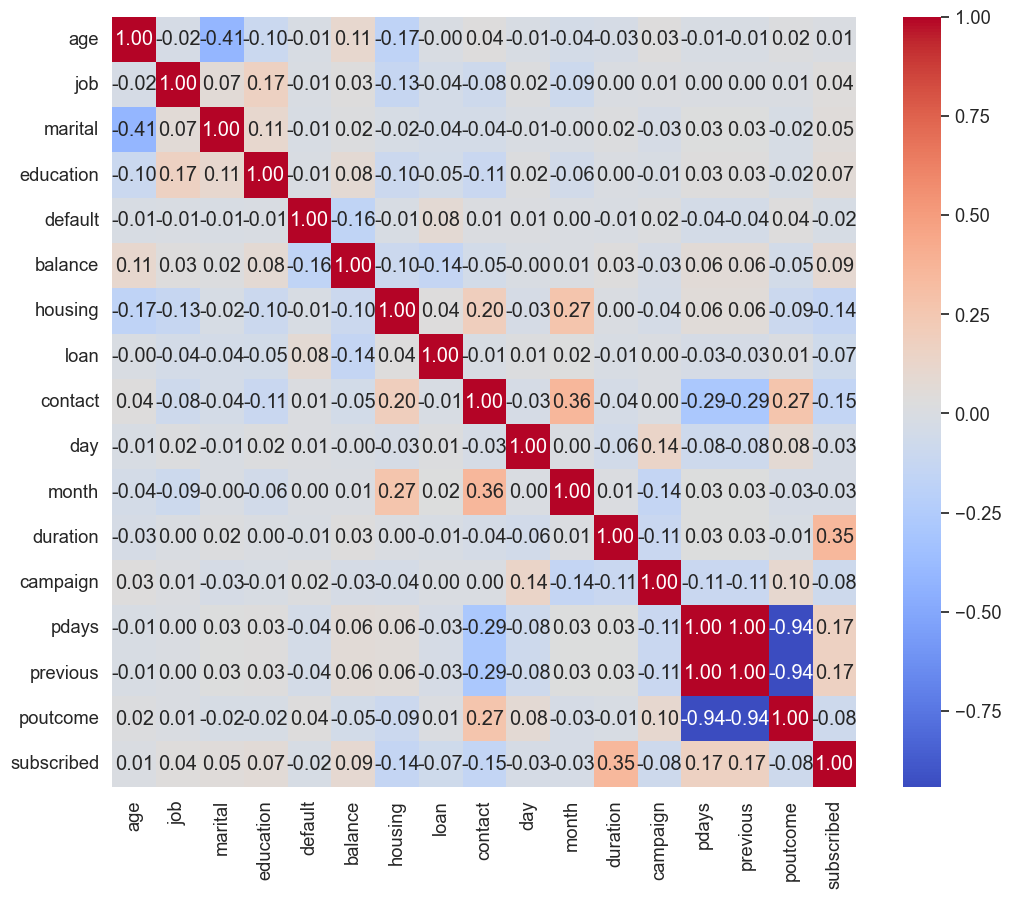

In [92]:
# Heatmap

# Set the figure size and font size
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

# Plot the heatmap with clear font size inside and dark color
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Show the plot
plt.show()

# Separating Target and Features Variable

In [93]:
# Separate the target variable from the features
X = df.drop('subscribed', axis=1)
y = df['subscribed']

In [94]:
print("Feature variables: ", list(X.columns))
print("Target variable: ", y.name)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Feature variables:  ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
Target variable:  subscribed
Shape of X: (31647, 16)
Shape of y: (31647,)


# Feature Scaling

In [95]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [96]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,0.67,0,0,1,19,9,-1.69,0.13,-6.755841,-6.756349,3,0
1,31,11,1,1,0,-0.64,0,0,0,20,5,-0.85,0.13,-6.755841,-6.756349,3,0
2,27,7,1,1,0,0.08,1,0,0,18,5,0.34,-1.11,-6.755841,-6.756349,3,0
3,57,4,0,2,0,1.34,0,0,0,22,6,1.84,-1.11,0.295416,0.296137,2,1
4,31,9,1,1,0,-0.50,1,0,0,4,3,0.94,-1.11,-6.755841,-6.756349,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,-0.65,1,0,0,12,8,-0.56,0.13,-6.755841,-6.756349,3,0
31643,53,4,0,2,0,-0.27,0,1,0,5,6,1.12,0.13,-6.755841,-6.756349,3,1
31644,32,4,2,2,0,-0.32,0,0,0,7,1,-1.88,0.75,-6.755841,-6.756349,3,0
31645,57,9,1,1,0,-0.40,1,0,1,15,8,-1.91,1.68,0.296001,0.296137,0,0


# Variance Inflation Factor (VIF)

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get all feature columns
X = df.drop(columns=['subscribed'])

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print VIF for each feature
print(vif)

      Feature           VIF
0         age  9.776698e+00
1         job  2.822358e+00
2     marital  4.223013e+00
3   education  3.702323e+00
4     default  1.052770e+00
5     balance  1.073834e+00
6     housing  2.413625e+00
7        loan  1.225579e+00
8     contact  1.992197e+00
9         day  4.650771e+00
10      month  5.257490e+00
11   duration  1.020127e+00
12   campaign  1.062859e+00
13      pdays  1.224004e+08
14   previous  1.223864e+08
15   poutcome  6.439958e+01


In [98]:
# Checking value count of target variables

y.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

# Best Random State

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()

    # Train the models on the training data
    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Test the models on the testing data and get the accuracy scores
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    dt_score = accuracy_score(y_test, dt.predict(X_test))
    rf_score = accuracy_score(y_test, rf.predict(X_test))

    # Get the maximum accuracy score and corresponding random state
    if lr_score > best_score:
        best_score = lr_score
        best_state = state
        best_model = 'Logistic Regression'
    if dt_score > best_score:
        best_score = dt_score
        best_state = state
        best_model = 'Decision Tree Classifier'
    if rf_score > best_score:
        best_score = rf_score
        best_state = state
        best_model = 'Random Forest Classifier'

print(f'Best accuracy score: {best_score}')
print(f'Best model: {best_model}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.9104265402843602
Best model: Random Forest Classifier
Max random state: 93


In [100]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [101]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25317, 16)
(6330, 16)
(25317,)
(6330,)


# Oversampling

In [102]:
from imblearn.over_sampling import RandomOverSampler

# Define the target variable from the features
X = df.drop('subscribed', axis=1)
y = df['subscribed']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the value counts of the resampled target variable
print(y_resampled.value_counts())

0    27932
1    27932
Name: subscribed, dtype: int64


# Modelling

Classification Algorithm

In [103]:
# Import Necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Logistic Regression(LR)

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Initialize and train model
model = LogisticRegression(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9001579778830964
Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      5594
           1       0.65      0.30      0.41       736

    accuracy                           0.90      6330
   macro avg       0.78      0.64      0.68      6330
weighted avg       0.88      0.90      0.88      6330



Accuracy score of this model is 90%

# Decision Tree Classifier (DTC)

In [105]:
# Initialize and train model
model = DecisionTreeClassifier(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8781990521327014
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5594
           1       0.48      0.49      0.48       736

    accuracy                           0.88      6330
   macro avg       0.70      0.71      0.71      6330
weighted avg       0.88      0.88      0.88      6330



Accuracy score of this model is 88%

# Random Forest Classifier (RFC)

In [106]:
# Initialize and train model
model = RandomForestClassifier(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9091627172195893
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5594
           1       0.68      0.41      0.51       736

    accuracy                           0.91      6330
   macro avg       0.80      0.69      0.73      6330
weighted avg       0.90      0.91      0.90      6330



Accuracy score of this model is 91%

# Extra Tree Classifier (ETC)

In [107]:
# Initialize and train model
model = ExtraTreesClassifier(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9055292259083728
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5594
           1       0.68      0.35      0.46       736

    accuracy                           0.91      6330
   macro avg       0.80      0.66      0.70      6330
weighted avg       0.89      0.91      0.89      6330



Accuracy score of this model is 91%

# Gradient Boosting Classifier (GBC)

In [108]:
# Initialize and train model
model = GradientBoostingClassifier(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.909478672985782
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      5594
           1       0.69      0.40      0.51       736

    accuracy                           0.91      6330
   macro avg       0.81      0.69      0.73      6330
weighted avg       0.90      0.91      0.90      6330



Accuracy score of this model is 91%

# AdaBoost Classifier

In [109]:
# Initialize and train model
model = AdaBoostClassifier(random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9058451816745655
Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      5594
           1       0.67      0.37      0.48       736

    accuracy                           0.91      6330
   macro avg       0.80      0.67      0.71      6330
weighted avg       0.89      0.91      0.89      6330



Accuracy score of this model is 90.5%

# Bagging Classifier

In [110]:
# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9078988941548183
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      5594
           1       0.65      0.45      0.53       736

    accuracy                           0.91      6330
   macro avg       0.79      0.71      0.74      6330
weighted avg       0.90      0.91      0.90      6330



Accuracy score of this model is 90.7%

# Naive Bayes (GaussianNB)

In [111]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8252764612954187
Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      5594
           1       0.33      0.47      0.39       736

    accuracy                           0.83      6330
   macro avg       0.63      0.67      0.64      6330
weighted avg       0.86      0.83      0.84      6330



Accuracy score of this model is 82.5%

# KNeighbors Classifier (KNN)

In [112]:
# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8909952606635071
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      5594
           1       0.58      0.22      0.32       736

    accuracy                           0.89      6330
   macro avg       0.74      0.60      0.63      6330
weighted avg       0.87      0.89      0.87      6330



Accuracy score of this model is 89%

# Support Vector Classifier (SVC)

In [113]:
# Initialize and train model
model = SVC(kernel='linear', random_state=93)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8981042654028436
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      5594
           1       0.72      0.20      0.31       736

    accuracy                           0.90      6330
   macro avg       0.81      0.60      0.63      6330
weighted avg       0.88      0.90      0.87      6330



Accuracy score of this model is 90%

# Cross Validation Score

In [114]:
from sklearn.model_selection import cross_val_score

# Logistic Regression CV score

In [115]:
# checking cv score for lr 
lr_cv = LogisticRegression()
lr_cv.fit(X_train, y_train)

lr_cv_score = cross_val_score(lr_cv, X_train, y_train, cv=5)
print("Cross Validation Score:", lr_cv_score)
print("Mean CV Score:", np.mean(lr_cv_score))

predlr_cv = lr_cv.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predlr_cv))
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, predlr_cv) - np.mean(lr_cv_score))

Cross Validation Score: [0.89533965 0.89178515 0.89670156 0.89512147 0.89354138]
Mean CV Score: 0.8944978421962263
Accuracy: 0.9001579778830964
Difference between accuracy score and cross-validation score is: 0.005660135686870071


# Decision Tree Classifier CV score

In [116]:
model = DecisionTreeClassifier(random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.86650869 0.85545024 0.8591744  0.86549477 0.8696425 ]
Mean CV Score: 0.8632541197343176
Accuracy: 0.8781990521327014
Difference between accuracy score and cross-validation score is: 0.014944932398383792


# Random Forest Classifier CV score

In [117]:
model = RandomForestClassifier(n_estimators=100, random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.89751185 0.89909163 0.89709658 0.89887419 0.89808414]
Mean CV Score: 0.8981316767341294
Accuracy: 0.9091627172195893
Difference between accuracy score and cross-validation score is: 0.011031040485459886


# Extra Tree Classifier CV score

In [118]:
model = ExtraTreesClassifier(n_estimators=100, random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.89830174 0.89691943 0.89768912 0.89788663 0.89749161]
Mean CV Score: 0.8976577040818077
Accuracy: 0.9055292259083728
Difference between accuracy score and cross-validation score is: 0.007871521826565142


# Gradient Boosting Classifier CV score

In [119]:
model = GradientBoostingClassifier(random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.90007899 0.89652449 0.90539206 0.89926921 0.90005925]
Mean CV Score: 0.900264799388682
Accuracy: 0.909478672985782
Difference between accuracy score and cross-validation score is: 0.00921387359710002


# AdaBoost Classifier

In [120]:
model = AdaBoostClassifier(random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.89415482 0.89218009 0.89867667 0.89670156 0.89551649]
Mean CV Score: 0.895445927911787
Accuracy: 0.9058451816745655
Difference between accuracy score and cross-validation score is: 0.010399253762778504


# Bagging Classifier

In [121]:
model = BaggingClassifier(random_state=93)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.88961295 0.89198262 0.89176378 0.89670156 0.89828165]
Mean CV Score: 0.8936685129142162
Accuracy: 0.9022116903633491
Difference between accuracy score and cross-validation score is: 0.00854317744913291


# GaussianNB CV score

In [122]:
model = GaussianNB()
# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.81812796 0.81220379 0.8331029  0.82619001 0.82164724]
Mean CV Score: 0.8222543815226722
Accuracy: 0.8252764612954187
Difference between accuracy score and cross-validation score is: 0.0030220797727464888


# KNeighbors Classifier CV score

In [123]:
# checking cv score for KNN

model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.88131912 0.88447867 0.88267825 0.88761604 0.88445586]
Mean CV Score: 0.884109587288631
Accuracy: 0.8909952606635071
Difference between accuracy score and cross-validation score is: 0.006885673374876111


# Support Vector Classifier CV score

In [124]:
model = SVC()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score 
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.88230648 0.88230648 0.88248074 0.88228323 0.88228323]
Mean CV Score: 0.8823320318801426
Accuracy: 0.8837282780410742
Difference between accuracy score and cross-validation score is: 0.0013962461609315913


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is Support Vector Classifier with a score of 0.0013962461609315913. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

Support Vector Classifier is the best performing model here.

Let's perform Hyperparameter tuning on few models with least difference to check the accuracy

# Hyperparameter Tuning

In [125]:
# Import necessary library
from sklearn.model_selection import RandomizedSearchCV

# SVC

In [126]:
from scipy.stats import uniform

# Define the parameter space for hyperparameter tuning
param_dist = {'C': uniform(loc=0, scale=1),
              'gamma': uniform(loc=0, scale=0.1),
              'kernel': ['rbf']}

# Initialize the SVC model
svc = SVC()

# Initialize the RandomizedSearchCV object
random_svc = RandomizedSearchCV(svc, param_distributions=param_dist, n_iter=20, cv=5, random_state=93)

# Fit the RandomizedSearchCV object to the data
random_svc.fit(X, y)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_svc.best_params_)
print("Best Score: ", random_svc.best_score_)


Best Hyperparameters:  {'C': 0.7787127840641244, 'gamma': 0.009253529359472202, 'kernel': 'rbf'}
Best Score:  0.891585272737121


# GaussianNB

In [127]:
from sklearn.naive_bayes import GaussianNB

# Create the model
gnb = GaussianNB()

# Define the parameter distributions to sample from
param_dist = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Create the randomized search CV object
gnb_random = RandomizedSearchCV(gnb, param_distributions=param_dist, cv=5, n_iter=20, random_state=93)

# Fit the randomized search CV object on the data
gnb_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gnb_random.best_params_)
print("Best score:", gnb_random.best_score_)

Best parameters: {'var_smoothing': 0.8111308307896871}
Best score: 0.8823320318801426


# LR

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Create the model
logreg = LogisticRegression(random_state=42)

# Define the parameter distributions to sample from
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 1500, 2000]
}

# Perform Randomized Search CV with 5-fold cross validation
random_search = RandomizedSearchCV(logreg, param_distributions=param_dist, n_iter=20, cv=5, random_state=93)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 500, 'C': 0.615848211066026}
Best score: 0.8946953691543424


# KNN

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# Define the hyperparameter space for KNN
param_dist = {'n_neighbors': range(1, 51),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': range(10, 51)}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Initialize the RandomizedSearchCV object
random_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=20, cv=5, random_state=93)

# Fit the RandomizedSearchCV object to the data
random_knn.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_knn.best_params_)
print("Best Score: ", random_knn.best_score_)


Best Hyperparameters:  {'weights': 'distance', 'n_neighbors': 9, 'leaf_size': 41, 'algorithm': 'ball_tree'}
Best Score:  0.8862820796042534


After performing hyperparameter tuning we can see that Naive Bayes(Gaussian NB) classifier is the best performing model with the highest and the improved score. Accuracy of GaussianNB is 88.2% earlier it was 82.5%

# Plotting AUC & ROC

In [130]:
from sklearn.metrics import roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are your data and target variables, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Fit the model on the training set
gnb.fit(X_train, y_train)

# Predict probabilities of the positive class (y=1) on the testing set
y_prob = gnb.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (fpr), True Positive Rate (tpr), and Thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC) using auc
auc_score = auc(fpr, tpr)

# Print the AUC score
print("AUC-ROC score for Gaussian Naive Bayes model: {:.3f}".format(auc_score))

AUC-ROC score for Gaussian Naive Bayes model: 0.804


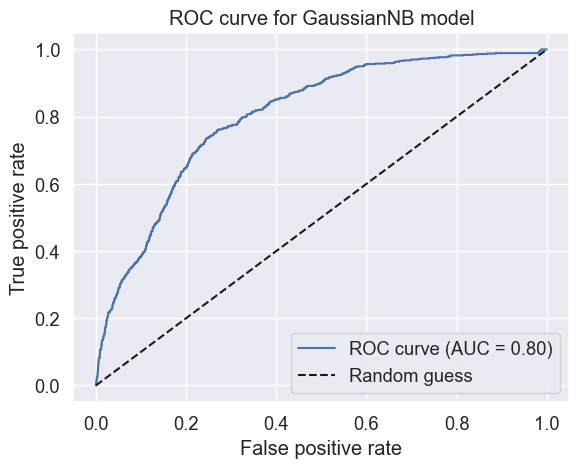

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the GaussianNB model
gnb = GaussianNB()

# Train the model on the training data
gnb.fit(X_train, y_train)

# Predict probabilities for the test data
y_probs = gnb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for GaussianNB model')
plt.legend(loc='best')
plt.show()

Here I have plotted ROC curve and AUC score of best performing model

# Save the model

In [134]:
# Lets save best performing model

import pickle

# train your model and obtain 'model' object

# save the model using pickle
with open('Bank_prediction.pickle', 'wb') as f:
    pickle.dump(model, f)

# Loading Saved model

In [135]:
with open('Bank_prediction.pickle', 'rb') as f:
    model = pickle.load(f)